# Εισαγωγή Βιβλιοθηκών

In [2]:
# Εισαγωγή της βιβλιοθήκης pandas για τη φόρτωση δεδομένων σε DataFrame για ευκολότερη διαχείριση, όπως το φιλτράρισμα, τη συγχώνευση 
# και την επεξεργασία των δεδομένων. Επίσης, διευκολύνει την εξαγωγή των δεδομένων σε νέα αρχεία CSV.
import pandas as pd

# Ενσωματωμένο module για διαχείριση προειδοποιήσεων (warnings) κατά την εκτέλεση του κώδικα
import warnings

# Τύπος λεξικού που δίνει αυτόματα αρχική τιμή για ανύπαρκτα κλειδιά
from collections import defaultdict

# Εισαγωγή της βιβλιοθήκης numpy για την παραγωγή τυχαίων αριθμών (np.random) και τη διαχείριση πινάκων, κάτι που είναι απαραίτητο για 
# τον χειρισμό μεγάλων συνόλων δεδομένων.
import numpy as np

# Εισαγωγή της βιβλιοθήκης re για εργασία με κανονικές εκφράσεις (regular expressions), διευκολύνοντας τον καθαρισμό κειμένου από 
# ειδικούς χαρακτήρες ή αχρησιμοποίητα δεδομένα, όπως στην συνάρτηση tokenize_text.
import re

# Εισαγωγή της βιβλιοθήκης time για μέτρηση του χρόνου εκτέλεσης, κρίσιμο για την ανάλυση της απόδοσης.
import time

# Εισαγωγή της βιβλιοθήκης sys, η οποία επιτρέπει την πρόσβαση σε παραμέτρους του συστήματος και runtime πληροφορίες. 
import sys

# Εισαγωγή της βιβλιοθήκης garbage collection, η οποία διαχειρίζεται τη μνήμη, επιτρέποντας την αποδέσμευση μη χρησιμοποιούμενης μνήμης 
# για τη μείωση του φόρτου του συστήματος. Ενεργοποιείται χειροκίνητα (gc.collect) για να αποτρέψει προβλήματα με τη διαχείριση μεγάλων δεδομένων.
import gc

# Εισαγωγή της βιβλιοθήκης psutil, η οποία παρέχει λεπτομερείς πληροφορίες για τη χρήση πόρων του συστήματος, όπως η μνήμη. 
# Χρησιμοποιείται για τη μέτρηση της χρήσης μνήμης κατά την κατασκευή ή εκτέλεση των διαφόρων δομών δεδομένων.
import psutil

# Εισαγωγή MinHash και MinHashLSH από τη βιβλιοθήκη datasketch για υλοποίηση Locality-Sensitive Hashing (LSH).
# Χρησιμοποιείται για την εύρεση ομοιοτήτων σε κείμενα, κάτι που είναι απαραίτητο για τη σύγκριση σχολίων και περιγραφών ασθενών.
from datasketch import MinHash, MinHashLSH

# Εισαγωγή τύπων δεδομένων από τη βιβλιοθήκη typing για την τυποποίηση των παραμέτρων και των επιστρεφόμενων τιμών των συναρτήσεων και κλάσεων. 
# Αυτή η τυποποίηση παρέχει σαφήνεια στον κώδικα και βοηθά στη διασφάλιση ότι οι συναρτήσεις λαμβάνουν και επιστρέφουν δεδομένα του σωστού τύπου.
from typing import List, Tuple, Optional

# Κατανόηση Δεδομένων

In [3]:
# Φόρτωση δεδομένων
df = pd.read_csv("data.csv") # Φορτώνει το αρχείο CSV σε DataFrame με όνομα df

# Χρησιμοποιούμενες στήλες
use_cols = [ # Ορίζει μια λίστα με τα ονόματα των στηλών που θα χρησιμοποιηθούν
    'ZIP Code', 
    'Year',
    'HCAHPS Linear Mean Value',
    'HCAHPS Question',
    'HCAHPS Answer Description'
]

print("Χρησιμοποιούμενες στήλες:", use_cols) # Εκτυπώνει τις στήλες που θα χρησιμοποιηθούν
print("Σχήμα DataFrame:", df.shape) # Εκτυπώνει το σχήμα (γραμμές, στήλες) του αρχικού DataFrame

# Εμφάνιση των πρώτων γραμμών μόνο για τις χρησιμοποιούμενες στήλες
print("\nΔείγμα πρώτων γραμμών για τις στήλες που χρησιμοποιούνται:")
print(df[use_cols].head())

# Τύποι δεδομένων
print("\nΤύποι δεδομένων:")
print(df[use_cols].dtypes)

# Έλεγχος για NaN/κενά μόνο σε αυτές τις στήλες
print("\nNaN/κενά ανά στήλη:")
print(df[use_cols].isnull().sum())

# Βασικά στατιστικά μόνο για τα αριθμητικά πεδία
print("\nΒασικά στατιστικά (αριθμητικά):")
print(df[['ZIP Code', 'Year', 'HCAHPS Linear Mean Value']].describe())

# Δείγμα πεδίων κειμένου
print("\nΔείγμα πεδίων κειμένου:")
for col in ['HCAHPS Question', 'HCAHPS Answer Description']:
    print(f"\n--- {col} ---")
    print(df[col].head())

Χρησιμοποιούμενες στήλες: ['ZIP Code', 'Year', 'HCAHPS Linear Mean Value', 'HCAHPS Question', 'HCAHPS Answer Description']
Σχήμα DataFrame: (299642, 43)

Δείγμα πρώτων γραμμών για τις στήλες που χρησιμοποιούνται:
   ZIP Code  Year HCAHPS Linear Mean Value  \
0     46350  2020                       84   
1     32424  2020           Not Applicable   
2     71653  2017            Not Available   
3     73110  2019           Not Applicable   
4     44691  2020           Not Applicable   

                                     HCAHPS Question  \
0        Overall hospital rating - linear mean score   
1  Patients who reported that their nurses "Usual...   
2                    Cleanliness - linear mean score   
3  Patients who reported that when receiving new ...   
4  Patients who reported that their doctors "Alwa...   

                           HCAHPS Answer Description  
0        Overall hospital rating - linear mean score  
1  Nurses "usually"  treated them with courtesy a...  
2       

In [4]:
print("\nTop 10 ερωτήσεις (HCAHPS Question):")
print(df['HCAHPS Question'].value_counts().head(10)) # Εμφανίζει τις 10 συχνότερες ερωτήσεις

print("\nTop 10 απαντήσεις (HCAHPS Answer Description):")
print(df['HCAHPS Answer Description'].value_counts().head(10)) # Εμφανίζει τις 10 συχνότερες απαντήσεις


Top 10 ερωτήσεις (HCAHPS Question):
Patients who reported NO, they would probably not or definitely not recommend the hospital                    4519
Patients who reported that YES, they were given information about what to do during their recovery at home    4479
Patients who reported that staff "Sometimes" or "Never" explained about medicines before giving it to them    4431
Recommend hospital - linear mean score                                                                        4422
Staff responsiveness - linear mean score                                                                      4422
Patients who reported that they "Sometimes" or "Never" received help as soon as they wanted                   4408
Cleanliness - star rating                                                                                     4408
Patients who reported that their doctors "Always" communicated well                                           4384
Patients who "Strongly Agree" they understo

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = df[use_cols] # Περιορίζει το DataFrame μόνο στις επιλεγμένες στήλες

# Εξασφάλιση σωστού τύπου δεδομένων (numeric), coercion για NaN
df['ZIP Code'] = pd.to_numeric(df['ZIP Code'], errors='coerce')  # Μετατρέπει το ZIP Code σε αριθμό, μη έγκυρα σε NaN
df['Year'] = pd.to_numeric(df['Year'], errors='coerce') # Μετατρέπει το Year σε αριθμό, μη έγκυρα σε NaN
df['HCAHPS Linear Mean Value'] = pd.to_numeric(df['HCAHPS Linear Mean Value'], errors='coerce') # Μετατρέπει το score σε αριθμό, μη έγκυρα σε NaN

# Αφαιρεί γραμμές που λείπουν Year ή Score ώστε να είναι έγκυρα για γραφήματα
df_box = df.dropna(subset=['Year', 'HCAHPS Linear Mean Value'])

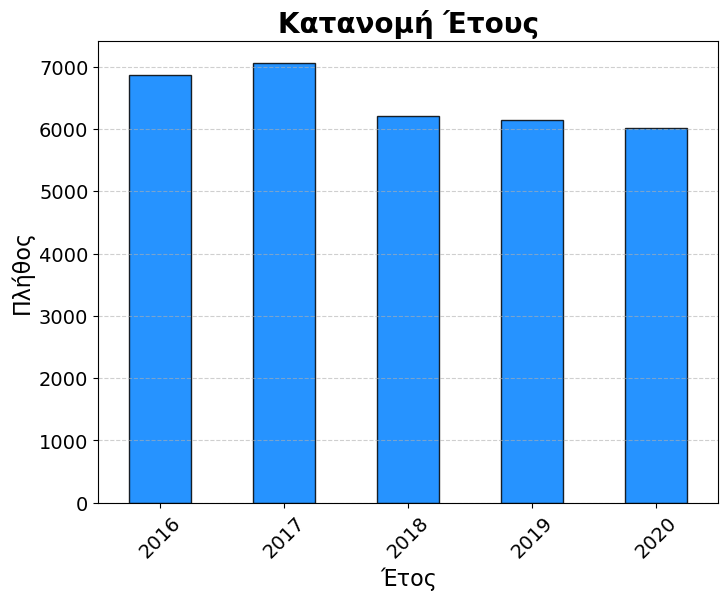

In [6]:
plt.figure(figsize=(8, 6)) # Δημιουργεί καμβά γραφήματος με συγκεκριμένο μέγεθος
years = df_box['Year'].astype(int) # Μετατρέπει το Year σε ακέραιο για καθαρή ομαδοποίηση
year_counts = years.value_counts().sort_index() # Μετρά εγγραφές ανά έτος και ταξινομεί με αύξουσα σειρά
year_counts.plot(kind='bar', color="#0080FF", edgecolor='black', alpha=0.85) # Ζωγραφίζει ράβδους για την κατανομή ετών
plt.title("Κατανομή Έτους", fontsize=20, weight='bold')# Θέτει τίτλο γραφήματος
plt.xlabel("Έτος", fontsize=16)  # Ετικέτα άξονα x
plt.ylabel("Πλήθος", fontsize=16) # Ετικέτα άξονα y
plt.xticks(rotation=45, fontsize=14) # Περιστροφή/μέγεθος ετικετών άξονα x
plt.yticks(fontsize=14) # Μέγεθος ετικετών άξονα y
plt.grid(axis='y', linestyle='--', alpha=0.6) # Οριζόντιο πλέγμα για ευκολότερη ανάγνωση
plt.show() # Εμφανίζει το γράφημα

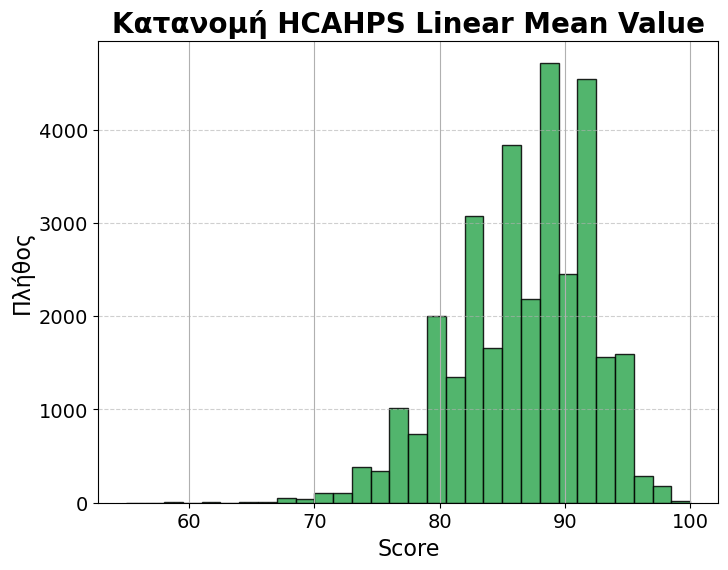

In [7]:
plt.figure(figsize=(8, 6))  # Νέος καμβάς γραφήματος
df_box['HCAHPS Linear Mean Value'].hist(bins=30, color="#34A853", edgecolor='black', alpha=0.85) # Ιστόγραμμα κατανομής του score
plt.title("Κατανομή HCAHPS Linear Mean Value", fontsize=20, weight='bold') # Τίτλος γραφήματος
plt.xlabel("Score", fontsize=16) # Ετικέτα άξονα x
plt.ylabel("Πλήθος", fontsize=16) # Ετικέτα άξονα y
plt.xticks(fontsize=14) # Μέγεθος ετικετών άξονα x
plt.yticks(fontsize=14) # Μέγεθος ετικετών άξονα y
plt.grid(axis='y', linestyle='--', alpha=0.6) # Οριζόντιο πλέγμα για το ιστόγραμμα
plt.show() # Εμφανίζει το γράφημα

<Figure size 1000x600 with 0 Axes>

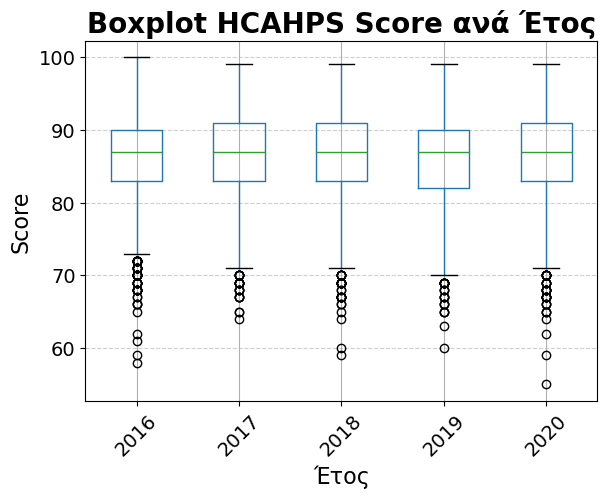

In [8]:
plt.figure(figsize=(10, 6)) # Νέος καμβάς γραφήματος για boxplot
grouped = df_box.groupby('Year').filter(lambda x: len(x) > 10) # Φιλτράρει έτη με >10 εγγραφές ώστε το boxplot να είναι ουσιαστικό
if not grouped.empty: # Ελέγχει αν υπάρχουν αρκετά δεδομένα μετά το φιλτράρισμα
    grouped.boxplot(column='HCAHPS Linear Mean Value', by='Year')  # Δημιουργεί boxplot score ανά έτος
    plt.title("Boxplot HCAHPS Score ανά Έτος", fontsize=20, weight='bold') # Θέτει τίτλο του boxplot
    plt.suptitle("") # Αφαιρεί τον προεπιλεγμένο υπερ-τίτλο της pandas
    plt.xlabel("Έτος", fontsize=16) # Ετικέτα άξονα x
    plt.ylabel("Score", fontsize=16) # Ετικέτα άξονα y
    plt.xticks(fontsize=14, rotation=45) # Περιστροφή/μέγεθος ετικετών έτους
    plt.yticks(fontsize=14) # Μέγεθος ετικετών τιμών
    plt.grid(axis='y', linestyle='--', alpha=0.6) # Πλέγμα στον άξονα y
else:
    plt.text(0.5, 0.5, 'Δεν υπάρχουν αρκετά δεδομένα ανά έτος', ha='center', va='center', fontsize=16)
    plt.axis('off')
plt.show()

# Υλοποίηση 

## Συναρτήσεις Προεπεξεργασίας Κειμένου & Παρακολούθησης Χρήσης Μνήμης

In [9]:
# Συνάρτηση για την προεπεξεργασία κειμένου (καθαρισμός και tokenization).
def tokenize_text(text: str) -> List[str]:
    text = text.lower() # Μετατρέπει ολόκληρο το κείμενο σε πεζά γράμματα για να διασφαλίσει ότι λέξεις με διαφορετική μορφή κεφαλαίων/πεζών αντιμετωπίζονται ως ίδιες.
    text = re.sub(r'[^a-z0-9\s]+', '', text) # Χρησιμοποιείται η βιβλιοθήκη re (regular expressions) για να αφαιρεθούν όλοι οι ειδικοί χαρακτήρες (π.χ., !, ?, @) εκτός από τα γράμματα (a-z), τους αριθμούς (0-9) και τα διαστήματα. Αυτό βοηθά στην απομάκρυνση θορύβου από το κείμενο, καθαρίζονταας τα περιττά στοιχεία.
    return text.split() # Διαχωρισμός του κειμένου σε μια λίστα από λέξεις (tokens) χρησιμοποιώντας τα διαστήματα ως διαχωριστές. 
    # Κάθε λέξη αποθηκεύεται ως στοιχείο της λίστας, έτοιμο για ανάλυση και επεξεργασία.
    
# Συνάρτηση για την επιστροφή της χρήσης μνήμης σε MB.
def memory_usage_mb():
    process = psutil.Process()  # Χρησιμοποιεί τη βιβλιοθήκη psutil για να δημιουργήσει ένα αντικείμενο Process, το οποίο αντιπροσωπεύει την τρέχουσα διαδικασία του προγράμματος (process). Αυτό επιτρέπει την πρόσβαση σε πληροφορίες για τους πόρους που χρησιμοποιούνται από το πρόγραμμα, όπως η μνήμη.
    mem = process.memory_info().rss  # Επιστρέφει πληροφορίες για τη χρήση μνήμης της διαδικασίας μέσω της μεθόδου memory_info(). Το rss (Resident Set Size) αντιπροσωπεύει την ποσότητα της μνήμης RAM που χρησιμοποιείται από τη διαδικασία εκείνη τη στιγμή. Η τιμή αυτή εκφράζεται σε bytes.
    return mem / (1024 * 1024)  # Η τιμή της μνήμης (σε bytes) διαιρείται με το 1024 * 1024 για να μετατραπεί σε megabytes (MB).

## Locality-Sensitive Hashing (LSH)

In [10]:
import logging # Βιβλιοθήκη καταγραφής μηνυμάτων (info/warning/error)
from typing import Iterable, List, Tuple, Dict, Optional, Union
from datasketch import MinHash, MinHashLSH # Υλοποιήσεις MinHash και LSH από το πακέτο datasketch

logging.basicConfig(level=logging.INFO) # Ρύθμιση βασικού logger στο επίπεδο INFO

class LSHIndex:

    def __init__( # Κατασκευαστής του ευρετηρίου LSH
        self,
        num_perm: int = 128, # Πλήθος hash-permutations για MinHash (ακρίβεια vs ταχύτητα/μέγεθος)
        threshold: float = 0.5, # Κατώφλι ομοιότητας (Jaccard) για να θεωρηθούν δύο υπογραφές «γειτονικές»
        tokenizer=None, # Προαιρετικός tokenizer (αν δεν δοθεί, χρησιμοποιείται ο default)
    ):
        self.num_perm = int(num_perm) # Αποθήκευση πλήθους permutations ως ακέραιος
        self.threshold = float(threshold) # Αποθήκευση κατωφλίου ομοιότητας ως float
        self.lsh = MinHashLSH(threshold=self.threshold, num_perm=self.num_perm) # Δημιουργία LSH index με datasketch

        # In-memory caches
        self.doc_tokens: Dict[str, List[str]] = {}         # doc_id -> λίστα tokens (για επαν-υπολογισμούς / exact rerank)
        self.doc_token_sets: Dict[str, frozenset] = {}     # doc_id -> σύνολο tokens (για ακριβή Jaccard)
        self.doc_minhash: Dict[str, MinHash] = {}          # doc_id -> MinHash υπογραφή (για γρήγορα LSH/approx scores)

        # Tokenizer
        self.tokenizer = tokenizer if tokenizer else self.default_tokenizer

    # --- Tokenizer & Δημιουργία MinHash
    
    @staticmethod
    def default_tokenizer(text: str) -> List[str]: # Απλός default tokenizer, όπου lower & split σε λέξεις
        if not isinstance(text, str): # Αν δεν είναι string, γύρνα κενή λίστα
            return []
        return [t for t in text.lower().split() if t] # Διαχωρισμός σε κενά, πεζά, φιλτράρισμα κενών tokens

    def _to_tokens(self, text_or_tokens) -> List[str]: # Aποδοχή είτε κειμένου είτε iterables από tokens
        if isinstance(text_or_tokens, str): # Αν είναι string
            return self.tokenizer(text_or_tokens) # κάνε tokenize
        try:
            return [str(t) for t in text_or_tokens] # Διαφορετικά, προσπάθησε να μετατρέψεις κάθε στοιχείο σε string
        except Exception: # Σε αποτυχία (μη iterable κτλπ)
            return [] # επέστρεψε κενή λίστα

    def _minhash_from_tokens(self, tokens: Iterable[str]) -> Optional[MinHash]: # Φτιάχνει MinHash από tokens
        tokens = list(tokens) # Μετατροπή σε λίστα
        if not tokens: # Αν δεν υπάρχουν tokens
            return None # δεν μπορεί να φτιαχτεί MinHash
        m = MinHash(num_perm=self.num_perm) # Δημιουργία MinHash με προκαθορισμένο num_perm
        for t in tokens: # Για κάθε token
            m.update(t.encode("utf8")) # ενημέρωσε την υπογραφή με το byte-string του token
        return m # Επιστροφή της υπογραφής

    # --- Εισαγωγές Εγγράφων
    
    def add_document(self, doc_id: str, text_or_tokens) -> None: # Προσθήκη εγγράφου με κείμενο ή έτοιμα tokens
        if doc_id in self.doc_tokens: # Έλεγχος διπλότυπου doc_id (στο cache tokens)
            logging.info(f"Duplicate doc_id '{doc_id}' – skipping.") # Καταγραφή και παράλειψη
            return

        tokens = self._to_tokens(text_or_tokens) # Μετατροπή εισόδου σε tokens
        if not tokens: # Αν δεν προέκυψαν tokens
            logging.warning(f"Document '{doc_id}' has no tokens – skipping.") # Προειδοποίηση
            return

        m = self._minhash_from_tokens(tokens) # Δημιουργία MinHash υπογραφής για το έγγραφο
        if m is None: # Αν απέτυχε (π.χ. άδεια tokens)
            logging.warning(f"Document '{doc_id}' produced empty MinHash – skipping.") # Προειδοποίηση
            return

        self.lsh.insert(doc_id, m) # Εισαγωγή στο LSH index 
        self.doc_tokens[doc_id] = tokens # Κράτα τα tokens στη μνήμη
        self.doc_token_sets[doc_id] = frozenset(tokens) # Κράτα και το σύνολο για ακριβή Jaccard
        self.doc_minhash[doc_id] = m # Κράτα και το MinHash για γρήγορη ομοιότητα

    def add_documents_batch(self, docs: Iterable[Tuple[str, Union[Iterable[str], str]]]) -> None: # Μαζική εισαγωγή
        for doc_id, text_or_tokens in docs: # Για κάθε ζεύγος (id, περιεχόμενο)
            self.add_document(doc_id, text_or_tokens) # Κάλεσε τον μοναδιαίο 

    def add_document_minhash(self, doc_id: str, m: MinHash, tokens: Optional[Iterable[str]] = None) -> None:
        if doc_id in self.doc_tokens or doc_id in self.doc_minhash: # Έλεγχος διπλότυπου σε caches
            logging.info(f"Duplicate doc_id '{doc_id}' – skipping.")
            return
        if not isinstance(m, MinHash):  # Έλεγχος τύπου m
            raise TypeError("m must be a datasketch.MinHash instance") # Σφάλμα αν ο τύπος δεν ταιριάζει

        self.lsh.insert(doc_id, m) # Εισαγωγή της υπογραφής στον LSH πίνακα
        if tokens is not None: # Αν δόθηκαν tokens
            tok_list = self._to_tokens(tokens) # μετατροπή
            self.doc_tokens[doc_id] = tok_list # αποθήκευση λίστας tokens
            self.doc_token_sets[doc_id] = frozenset(tok_list) # και σε σύνολο για exact Jaccard
        self.doc_minhash[doc_id] = m # Αποθήκευση MinHash

    def remove_document(self, doc_id: str) -> None: # «Διαγραφή» εγγράφου από τις caches (όχι από LSH), το LSH δεν υποστηρίζει delete

        self.doc_tokens.pop(doc_id, None) # Αφαίρεση από cache tokens (αν υπάρχει)
        self.doc_token_sets.pop(doc_id, None) # Αφαίρεση από cache συνόλων
        self.doc_minhash.pop(doc_id, None) # Αφαίρεση από cache MinHash

    def size(self) -> int: # Πλήθος εγγράφων στο in-memory index
        return len(self.doc_minhash) # Επιστροφή με βάση τα αποθηκευμένα MinHash

    # --- Ανάκτηση Υποψηφίων (LSH) & Backfill
    
    def _minhash_query_candidates(self, q_m: MinHash) -> List[str]: # Κύρια ανάκτηση υποψηφίων μέσω LSH query
        try:
            return list(self.lsh.query(q_m)) # Ερώτημα στο LSH στην λίστα doc_ids με σύγκρουση σε κάποιο κάδο
        except Exception as e: # Catch τυχόν σφάλματα βιβλιοθήκης
            logging.warning(f"LSH query failed: {e}") # Καταγραφή προειδοποίησης
            return [] # Επιστροφή κενής λίστας υποψηφίων

    def _global_candidates_by_minhash(self, q_m: MinHash, budget: Optional[int] = None): # Backfill υποψηφίων με global scan

        pairs = [(doc_id, float(q_m.jaccard(m))) for doc_id, m in self.doc_minhash.items()] # Υπολογισμός approx ομοιότητας για όλα
        pairs.sort(key=lambda x: x[1], reverse=True) # Ταξινόμηση από τη μεγαλύτερη ομοιότητα προς τα κάτω
        return pairs if budget is None else pairs[:budget] # Επιστροφή όλων ή των πρώτων budget

    # --- Ακριβής Επαναβαθμολόγηση (Exact Rerank)
    
    def _exact_rerank( # Ακριβής επαναβαθμολόγηση (rerank) με Jaccard συνόλων
        self,
        q_tokens: Iterable[str], # Tokens του ερωτήματος
        candidates_scored: List[Tuple[str, float]], # Λίστα (doc_id, approx_score) προ ταξινομημένη
        exact_pool: int # Πλήθος κορυφαίων υποψηφίων για ακριβή Jaccard
    ) -> List[Tuple[str, float]]:
        q_set = frozenset(q_tokens) # Μετατροπή tokens ερωτήματος σε σύνολο (για Jaccard)
        pool = candidates_scored[:min(exact_pool, len(candidates_scored))] # Top-N υποψήφιοι προς επανεκτίμηση
        reranked: List[Tuple[str, float]] = [] # Νέα λίστα με (doc_id, exact_score)

        for doc_id, approx_sim in pool: # Για κάθε υποψήφιο του pool
            dset = self.doc_token_sets.get(doc_id) # Πάρε το σύνολο tokens του doc (αν υπάρχει)
            if dset is None: # Αν δεν υπάρχουν cached tokens
                reranked.append((doc_id, approx_sim)) # διατήρησε το περίπου σκορ
                continue
            inter = len(q_set & dset) # Μέγεθος τομής συνόλων
            union = len(q_set) + len(dset) - inter # Μέγεθος ένωσης (|A|+|B|-|A∩B|)
            sim_exact = 0.0 if union == 0 else inter / union # Ακριβής Jaccard (προφύλαξη για union=0)
            reranked.append((doc_id, float(sim_exact))) # Αποθήκευση ακριβούς σκορ

        reranked.sort(key=lambda x: x[1], reverse=True) # Ταξινόμηση κατά φθίνουσα ομοιότητα
        return reranked # Επιστροφή reranked λίστας

    # --- Κύριο Ερώτημα
    
    def query_similar( # Κύρια μέθοδος αναζήτησης παρόμοιων
        self,
        query_text: str, # Κείμενο ερωτήματος (θα γίνει tokenize)
        top_n: int = 3, # Πλήθος τελικών αποτελεσμάτων
        rerank_exact: bool = False, # Αν True → κάνε exact Jaccard rerank στο top pool
        exact_pool: int = 20,  # Πόσους υποψηφίους να επανεκτιμήσεις ακριβώς
        min_candidates: int = 0, # Ελάχιστος αριθμός υποψηφίων που θέλουμε πριν τον τελικό κόψιμο
        backfill: bool = True,  # Αν True → ενεργοποίησε global backfill όταν οι υποψήφιοι είναι λίγοι
        backfill_budget: Optional[int] = None, # Όριο στο πόσους global υποψηφίους να υπολογίσουμε
        return_pairs: bool = True, # Αν True → γύρνα (doc_id, score), αλλιώς μόνο doc_ids
    ):
        tokens = self._to_tokens(query_text) # Βήμα 1: Tokenize το ερώτημα
        if not tokens: # Αν δεν υπάρχουν tokens
            logging.warning("Query has no tokens.") # προειδοποίηση
            return [] if return_pairs else [] # και κενό αποτέλεσμα

        q_m = self._minhash_from_tokens(tokens) # Δημιουργία MinHash υπογραφής ερωτήματος
        if q_m is None: # Αν έχουμε αποτυχία δημιουργίας
            logging.warning("Query MinHash is empty.") # προειδοποίηση
            return [] if return_pairs else []  # και κενό αποτέλεσμα

        cand_ids = self._minhash_query_candidates(q_m) # Βήμα 2: απόσπαση υποψηφίων από LSH

        approx_scored = [(doc_id, float(q_m.jaccard(self.doc_minhash[doc_id]))) # Υπολογισμός approx Jaccard για κάθε υποψήφιο
                         for doc_id in cand_ids]
        approx_scored.sort(key=lambda x: x[1], reverse=True) # Ταξινόμηση υποψηφίων κατά φθίνουσα ομοιότητα

        if backfill: # Βήμα 3: Αν επιτρέπεται backfill
            need = max(0, min_candidates - len(approx_scored)) # Υπολόγισε πόσους ακόμα χρειαζόμαστε για να πιάσουμε το όριο
            if need > 0:  # Αν όντως χρειάζονται
                budget = backfill_budget if backfill_budget is not None else max(need * 3, top_n * 20)  # Προϋπολογισμός υποψηφίων
                global_scored = self._global_candidates_by_minhash(q_m, budget=budget) # Παγκόσμια κατάταξη με approx Jaccard
                seen = {doc_id for doc_id, _ in approx_scored} # Σετ από ήδη γνωστούς υποψηφίους
                for doc_id, score in global_scored: # Πρόσθεσε νέους μέχρι να πιάσουμε min_candidates
                    if doc_id not in seen:  # Απόφυγε διπλοεγγραφές
                        approx_scored.append((doc_id, score)) # Πρόσθεσε νέο υποψήφιο
                        seen.add(doc_id) # Σημείωσε ότι το είδαμε
                    if len(approx_scored) >= min_candidates:  # Σταμάτα όταν φτάσεις το κατώφλι
                        break
                approx_scored.sort(key=lambda x: x[1], reverse=True) # Ξανά ταξινόμηση μετά τη συγχώνευση

        # Βήμα 4: Rerank (optional)
        if rerank_exact and approx_scored: # Αν ζητήθηκε ακριβές rerank και υπάρχουν υποψήφιοι
            reranked = self._exact_rerank(tokens, approx_scored, exact_pool=exact_pool) # Εκτέλεση exact Jaccard για top pool
            out = reranked[:top_n] # Πάρε τα top_n μετά το rerank
        else:
            out = approx_scored[:top_n] # Αλλιώς κράτα την approx κατάταξη

        return out if return_pairs else [doc_id for doc_id, _ in out] # Επιστροφή είτε με σκορ είτε μόνο ids

    def query_similar_tokens(  # Όταν έχουμε ήδη tokens
        self,
        query_tokens: Iterable[str], # Iterable από tokens ερωτήματος
        top_n: int = 3, # Πλήθος αποτελεσμάτων
        rerank_exact: bool = False, # Αν να γίνει ακριβές rerank
        exact_pool: int = 20, # Μέγεθος pool για exact Jaccard
        min_candidates: int = 0, # Ελάχιστοι υποψήφιοι με backfill
        backfill: bool = True, # Ενεργοποίηση backfill
        backfill_budget: Optional[int] = None, # Προϋπολογισμός backfill
        return_pairs: bool = True, # Επιστροφή (id, score) ή μόνο ids
    ):
        return self.query_similar(  # Ανακατεύθυνση στην κύρια query με join των tokens
            " ".join(query_tokens),  # Τα tokens ενώνονται (ο default tokenizer θα τα ξανασπάσει)
            top_n=top_n, # Προώθηση παραμέτρων
            rerank_exact=rerank_exact,
            exact_pool=exact_pool,
            min_candidates=min_candidates,
            backfill=backfill,
            backfill_budget=backfill_budget,
            return_pairs=return_pairs,
        )


## KD-Tree

In [11]:
# Αναπαριστά έναν κόμβο στο K-D Tree
class KDTreeNode:
    def __init__(self, point: Tuple[float, ...], axis: int, left=None, right=None, depth=0):
        self.point = point               # Συντεταγμένες του σημείου (k-διάστατο tuple)
        self.axis = axis                 # Άξονας διαχωρισμού (0..k-1) για αυτό το επίπεδο
        self.left = left                 # Αριστερό υποδέντρο: σημεία με μικρότερη τιμή στον axis
        self.right = right               # Δεξί υποδέντρο: σημεία με μεγαλύτερη/ίση τιμή στον axis
        self.depth = depth               # Βάθος του κόμβου μέσα στο δέντρο

In [12]:
class KDTree:

    # --- Δημιουργία Δέντρου
    
    def __init__(self, points: List[Tuple[float, ...]] = None):
        self.k = len(points[0]) if points else 0   # Αριθμός διαστάσεων k (0 αν δεν δόθηκαν σημεία)         
        self.root = self.build(points) if points else None  # Αν υπάρχουν σημεία, χτίσε το KD-Tree από την αρχή

    # Αναδρομική κατασκευή του KD-Tree
    def build(self, points: List[Tuple[float, ...]], depth: int = 0) -> Optional[KDTreeNode]:
        if not points:
            return None   #  Αν δεν υπάρχουν σημεία, επιστρέφει None (φύλλο)
        axis = depth % self.k                               # Επιλογή άξονα διαχωρισμού με κυκλική εναλλαγή ανά διάσταση
        sorted_points = sorted(points, key=lambda x: x[axis])  # Ταξινομεί τα σημεία ως προς τον άξονα που επιλέχθηκε.
        median = len(sorted_points) // 2                    # Εντοπίζει το μέσο σημείο (median) της ταξινομημένης λίστας για ισορροπημένο κόψιμο.
        # Δημιουργεί νέο κόμβο KDTreeNode και κατασκευάζει αναδρομικά τα υποδέντρα αριστερά και δεξιά του median.
        return KDTreeNode(
            point=sorted_points[median],  # Σημείο που αποθηκεύεται στον κόμβο (median)
            axis=axis,     # Άξονας διαχωρισμού για το συγκεκριμένο επίπεδο
            left=self.build(sorted_points[:median], depth + 1),   # Υποδέντρο με τα "μικρότερα" ως προς axis
            right=self.build(sorted_points[median + 1:], depth + 1),  # Υποδέντρο με τα "μικρότερα" ως προς axis
            depth=depth # Βάθος του κόμβου στο δέντρο
        )

    # --- Εισαγωγή
    
    # Αναδρομική εισαγωγή νέου σημείου στο KD-Tree.
    # Σύγκριση κάθε φορά του νέου σημείου με το σημείο του τρέχοντος κόμβου ως προς τον άξονα του κόμβου. 
    # Το σημείο τοποθετείται αριστερά ή δεξιά ανάλογα με τη σύγκριση στη συγκεκριμένη διάσταση.
    def insert_point(self, node: KDTreeNode, point: Tuple[float, ...], depth: int = 0) -> KDTreeNode:
        if node is None:
            return KDTreeNode(point, axis=depth % self.k, depth=depth) # Αν φτάσουμε σε κενή θέση, δημιουργούμε νέο κόμβο.
        axis = node.axis # Ποια διάσταση χρησιμοποιεί ο τρέχων κόμβος
        if point[axis] < node.point[axis]: # Αν το νέο σημείο είναι αριστερά στον axis
            node.left = self.insert_point(node.left, point, depth + 1) # Κατέβα στο αριστερό υποδέντρο
        else:
            node.right = self.insert_point(node.right, point, depth + 1) # Διαφορετικά, πάμε δεξιά
        return node # Επιστροφή του κόμβου
        
    # Εισαγωγή νέου σημείου, ξεκινώντας από τη ρίζα του δέντρου
    def insert(self, point: Tuple[float, ...]):
        self.root = self.insert_point(self.root, point) # Ενημέρωση της ρίζας (αν ήταν None, γίνεται νέος κόμβος)

    # --- Διαγραφή

    # Βρες τον κόμβο με την ελάχιστη τιμή στη διάσταση d, μέσα από το υποδέντρο node
    def find_min(self, node: KDTreeNode, d: int) -> KDTreeNode:
        if node is None:
            return None # Κενό υποδέντρο άρα δεν υπάρχει min
        if node.axis == d: # Αν αυτός ο κόμβος κόβει στη διάσταση d 
            if node.left is None: # τότε το ελάχιστο βρίσκεται εδώ ή αριστερά
                return node  # Δεν υπάρχει αριστερό παιδί, ο ίδιος είναι το min
            return self.find_min(node.left, d) # Αλλιώς, κατέβα αριστερά για min
            
        # Διαφορετική διάσταση, πρέπει να ελέγξουμε τρέχον/αριστερά/δεξιά και να πάρουμε το μικρότερο
        left_min = self.find_min(node.left, d) # Min στο αριστερό υποδέντρο
        right_min = self.find_min(node.right, d) # Min στο δεξί υποδέντρο
        candidates = [n for n in [node, left_min, right_min] if n is not None] # Συγκρίνουμε όλα τα μη-κενά (τον τρέχοντα κόμβο και τα δύο ελάχιστα παιδιά)
        return min(candidates, key=lambda n: n.point[d]) # Επιστρέφει τον κόμβο με τη μικρότερη τιμή στη διάσταση d

    # Διαγραφή ενός συγκεκριμένου σημείου από το υποδέντρο node
    def delete_point(self, node: KDTreeNode, point: Tuple[float, ...]) -> KDTreeNode:
        if node is None:
            return None # Άδειο υποδέντρο, άρα τίποτα να διαγράψουμε
        axis = node.axis # Διάσταση διαχωρισμού του τρέχοντος κόμβου

        if node.point == point: # Βρέθηκε ο κόμβος προς διαγραφή
            if node.right: # Αν υπάρχει δεξί παιδί
                min_node = self.find_min(node.right, axis) # Βρες το ελάχιστο στον ίδιο axis δεξιά
                node.point = min_node.point # Αντικατάστησε το τρέχον σημείο με αυτό το ελάχιστο
                node.right = self.delete_point(node.right, min_node.point) # Και αφαίρεσέ το από το δεξί
            
            elif node.left: # Αλλιώς, αν υπάρχει μόνο αριστερό παιδί
                min_node = self.find_min(node.left, axis) # Βρες ελάχιστο στον ίδιο axis αριστερά
                node.point = min_node.point # Βάλε το ελάχιστο στο τρέχον σημείο
                node.right = self.delete_point(node.left, min_node.point) # Διαγραφή εκείνου του min από αριστερά
                node.left = None # Και αδειάζουμε το αριστερό υποδέντρο
            else:
                return None # Φύλλο χωρίς παιδιά, γίνεται απλή διαγραφή
        elif point[axis] < node.point[axis]: # Αν το σημείο προς διαγραφή είναι αριστερά στον axis
            node.left = self.delete_point(node.left, point) # Κατέβα αριστερά
        else: # Αλλιώς είναι δεξιά
            node.right = self.delete_point(node.right, point) # Κατέβα δεξιά
        return node # Επιστροφή του κόμβου

    # Διαγραφή σημείου από το δέντρο ξεκινώντας από τη ρίζα
    def delete(self, point: Tuple[float, ...]):
        self.root = self.delete_point(self.root, point) # Ενημέρωσε τη ρίζα μετά τη διαγραφή

    # --- Ενημέρωση

    # Αντικατάσταση παλιού σημείου με νέο (delete + insert)
    def update(self, old_point: Tuple[float, ...], new_point: Tuple[float, ...]):
        self.delete(old_point) # Διαγράφει το παλιό σημείο από το δέντρο
        self.insert(new_point) # Εισάγει το νέο σημείο στο δέντρο
    
    # --- Εύρεση Πλησιέστερου Γείτονα (kNN)

    # Τετραγωνική ευκλείδεια απόσταση
    def distance_sq(self, a: Tuple[float, ...], b: Tuple[float, ...]) -> float:
        return sum((a[i] - b[i]) ** 2 for i in range(len(a))) # Άθροισμα διαφορών τετραγώνων ανά διάσταση

    # Εύρεση των k πλησιέστερων γειτόνων για ένα target σημείο
    def kNN(self, target: Tuple[float, ...], k: int) -> List[Tuple[float, ...]]:
        import heapq # Χρήση heap για διατήρηση των k καλύτερων
        heap = []  # Max-heap μέσω αποθήκευσης αρνητικών αποστάσεων
        
        # Εσωτερική αναδρομική DFS αναζήτηση
        def recursive_search(node: KDTreeNode):
            if node is None:
                return # Άδειος κόμβος, άρα τέλος κλαδιού
            point = node.point # Σημείο στον τρέχοντα κόμβο
            dist = self.distance_sq(point, target) # Απόσταση από τον στόχο
            
            if len(heap) < k: # Αν δεν έχουμε συγκεντρώσει ακόμα k στοιχεία
                heapq.heappush(heap, (-dist, point)) # Πέρασε το τρέχον (αρνητική απόσταση ⇒ max-heap)
            else: # Αλλιώς, σύγκρινε με το πιο μακρινό μέσα στο heap
                if dist < -heap[0][0]: # Αν είμαστε πιο κοντά από το τρέχον χειρότερο
                    heapq.heappushpop(heap, (-dist, point)) # Αντικατάστησέ το
            axis = node.axis  # Διάσταση διαχωρισμού
            diff = target[axis] - point[axis] # Προς τα πού βρίσκεται ο στόχος στον axis
            
            # Επιλογή πρώτα του κοντινού και μετά του μακρινού υποδέντρου ως προς τον άξονα διαχωρισμού
            close, away = (node.left, node.right) if diff < 0 else (node.right, node.left)
            recursive_search(close)  # Κατέβα στο κοντινό υποδέντρο
            
            # Οπισθοδρόμηση 
            # Αν το όριο (diff^2) υπόσχεται καλύτερο γείτονα, έλεγξε και το άλλο κλαδί
            if len(heap) < k or diff ** 2 < -heap[0][0]: # Αν δεν έχει γεμίσει ή υπάρχει πιθανότητα βελτίωσης
                recursive_search(away) # ερεύνησε και το μακρινό υποδέντρο
                
        recursive_search(self.root) # Εκκίνηση από τη ρίζα
        
        return [p for (_, p) in sorted(heap, reverse=True)] # Ταξινόμηση και εξαγωγή σημείων

    # --- Εύρεση όλων των σημείων εντός περιοχής (ορθογώνιο box ανά διάσταση)

    # Επιστρέφει όλα τα σημεία που βρίσκονται εντός των ορίων query_ranges
    # μορφή: [(min0,max0), (min1,max1), ... , (min_{k-1}, max_{k-1})]
    def range_query(self, query_ranges: List[Tuple[float, float]]) -> List[Tuple[float, ...]]:
        
        results = [] # Λίστα για αποθήκευση αποτελεσμάτων
        
        # --- Βοηθητικές συναρτήσεις για τον έλεγχο περιοχής

        # Ελέγχει αν ένα σημείο είναι εντός των ορίων σε όλες τις διαστάσεις
        def is_point_in_range(point):
            # Επιστρέφει True αν όλες οι διαστάσεις του σημείου είναι μέσα στα αντίστοιχα όρια
            return all(query_ranges[i][0] <= point[i] <= query_ranges[i][1] for i in range(self.k))
        
        # Ελέγχει αν μια περιοχή (region) περιέχεται πλήρως στο query_ranges
        def is_region_contained(region):
            for i in range(self.k):
                if region[i][0] < query_ranges[i][0] or region[i][1] > query_ranges[i][1]: 
                    return False # Αν οποιοδήποτε άκρο βγαίνει εκτός, δεν είναι πλήρως εντός
            return True # Αλλιώς, περιέχεται πλήρως

        # Ελέγχει αν υπάρχει τομή της περιοχής με το query_ranges
        def regions_intersect(region):
            for i in range(self.k):
                if region[i][1] < query_ranges[i][0] or region[i][0] > query_ranges[i][1]:
                    return False # Αν δεν υπάρχει επικάλυψη σε κάποια διάσταση, επιστρέφει False. 
            return True # Υπάρχει επικάλυψη σε όλες τις διαστάσεις

        # Προσθέτει όλα τα σημεία ενός υποδέντρου (όταν η περιοχή του είναι 100% μέσα στο query)
        def add_subtree(node):
            if node is None:
                return  # Κενός κόμβος, άρα τίποτα να προσθέσουμε
            results.append(node.point) # Πρόσθεσε το σημείο του τρέχοντος κόμβου
            add_subtree(node.left) # Αναδρομή αριστερά
            add_subtree(node.right)  # Αναδρομή δεξιά

        # Αναδρομική συνάρτηση για range query σε KD-Tree
        def recursive_range(node, region):
            if node is None:
                return # Εάν ο τρέχων κόμβος είναι κενός (δηλαδή δεν υπάρχουν άλλα σημεία σε αυτό το υποδέντρο), η αναζήτηση σταματάει
                
            if is_region_contained(region): # Αν όλο το region είναι μέσα στο query
                add_subtree(node) # πρόσθεσε μαζικά όλο το υποδέντρο και βγες
                return
                
            if is_point_in_range(node.point): # Έλεγχος του ίδιου του σημείου κόμβου
                results.append(node.point) # Αν ανήκει στο query, πρόσθεσέ το
            axis = node.axis  # Τρέχων άξονας διαχωρισμού
            point_value = node.point[axis] # Τιμή συντεταγμένης στον axis
            
            if node.left:  # Αν υπάρχει αριστερό παιδί
                left_region = [list(r) for r in region] # Κάνε αντίγραφο του region
                left_region[axis][1] = point_value # Στενεύει το max στον axis (όλα αριστερά ≤ point_value)
                # αφού τα αριστερά σημεία του KD-Tree έχουν μικρότερη τιμή στον άξονα.
                if regions_intersect(left_region): # Αν το αριστερό κουτί τέμνει το query
                    recursive_range(node.left, left_region) # Το ερευνούμε

            if node.right: # Αν υπάρχει δεξί παιδί
                right_region = [list(r) for r in region] # Αντίγραφο του region
                right_region[axis][0] = point_value # Στενεύει το min στον axis (όλα δεξιά ≥ point_value)
                if regions_intersect(right_region):  # Αν το δεξί κουτί τέμνει το query
                    recursive_range(node.right, right_region) # Το ερευνούμε
                    
        initial_region = [[float('-inf'), float('inf')] for _ in range(self.k)] # Αρχικά άπειρα όρια σε κάθε διάσταση
        recursive_range(self.root, initial_region) # Εκκίνηση από τη ρίζα με το αρχικό άπειρο κουτί
        return results # Επιστροφή όλων των σημείων που ανήκουν στο query

## OctTree 

In [13]:
# Κάθε κόμβος αντιπροσωπεύει έναν κυβικό όγκο στον 3D χώρο,
# έχει έως 8 παιδιά (ένα για κάθε οκτάντη) και αποθηκεύει σημεία μόνο αν είναι φύλλο.
class OctreeNode:
    def __init__(self, center: List[float], size: float):
        self.center = center                 # Συντεταγμένες [x, y, z] του κέντρου του κυβικού όγκου
        self.size = float(size)              # Μήκος ακμής του κυβικού όγκου
        self.children: List[Optional["OctreeNode"]] = [None] * 8 # 8 παιδικοί κόμβοι (ένας ανά οκτάντη), αρχικά None
        self.is_leaf = True # Σημαία που δηλώνει αν ο κόμβος είναι φύλλο (δεν έχει παιδιά)
        self.data: List[dict] = []           # Λίστα σημείων (λεξικά) όταν ο κόμβος είναι φύλλο

In [14]:
from __future__ import annotations
from typing import List, Optional, Dict, Tuple
import heapq

class Octree:

    # --- Αρχικοποίηση
    
    def __init__(self,
                 root_center: List[float],
                 root_size: float,
                 max_points_per_node: int = 8,
                 min_size: float = 1e-6,
                 max_depth: int = 32):
        
        self.root = OctreeNode(root_center, root_size) # Δημιουργεί τον ριζικό κόμβο (κύβος που καλύπτει τον χώρο)

        self.max_points_per_node = int(max_points_per_node) # Όριο σημείων σε φύλλο πριν γίνει υποδιαίρεση (split)

        self.min_size = float(min_size) # Ελάχιστο επιτρεπτό μήκος ακμής κόμβου (σταματά υπερβολικά splits)

        self.max_depth = int(max_depth) # Μέγιστο βάθος δέντρου
        
        self.dim = 3  # Το δέντρο δουλεύει σε τρισδιάστατο χώρο (x, y, z)

    # --- Εισαγωγή
           
    def _in_bounds(self, coords: List[float], node: OctreeNode) -> bool:
                half = node.size / 2.0 # Μισό μήκος ακμής
                eps = 1e-12  # Μικρό περιθώριο για αριθμητικά σφάλματα
                return (node.center[0]-half-eps <= coords[0] <= node.center[0]+half+eps and # Έλεγχος στον άξονα X
                        node.center[1]-half-eps <= coords[1] <= node.center[1]+half+eps and # Έλεγχος στον άξονα Y
                        node.center[2]-half-eps <= coords[2] <= node.center[2]+half+eps) # Έλεγχος στον άξονα Z
        
    def _octant(self, coords: List[float], center: List[float]) -> int:
        o = 0 # Bitmask 3 bit: b0→X, b1→Y, b2→Z
        if coords[0] > center[0]: o |= 1 << 0 # Αν x > cx, βάλε το bit 0 (δεξιά στο X)
        if coords[1] > center[1]: o |= 1 << 1 # Αν y > cy, βάλε το bit 1 (πάνω στο Y)
        if coords[2] > center[2]: o |= 1 << 2 # Αν z > cz, βάλε το bit 2 (μπροστά στο Z)
        return o # Επιστροφή κωδικοποιημένου οκτάντη (0..7)
        
    def insert(self, point: Dict, node: Optional[OctreeNode] = None, depth: int = 0) -> None:
        
        if node is None: # Αν δεν δοθεί κόμβος
            node = self.root # ξεκίνα από τη ρίζα

        coords = point.get('coords') # Πάρε τις συντεταγμένες του σημείου 
        if coords is None or len(coords) != self.dim:  # Αν δεν υπάρχουν ή δεν έχουν σωστή διάσταση (πρέπει να είναι 3 για 3D), δημιουργείται σφάλμα
            raise ValueError("Point must have 'coords' with length 3.")
        
        if not self._in_bounds(coords, node): # Αν το σημείο είναι εκτός AABB του κόμβου
            return  # μην το εισάγεις εδώ (τερματισμός κλαδιού)

        if node.is_leaf: # Αν ο κόμβος είναι φύλλο (δεν έχει παιδιά)
            # Έλεγχος συνθηκών τερματισμού: 
            # 1) Αν δεν έχει ξεπεραστεί το μέγιστο πλήθος σημείων, 
            # 2) Αν το μέγεθος του κόμβου είναι μικρότερο/ίσο από το ελάχιστο, 
            # 3) Αν έχουμε φτάσει το μέγιστο βάθος
            if (len(node.data) < self.max_points_per_node) or (node.size <= self.min_size) or (depth >= self.max_depth):
                node.data.append(point) # Απλή προσθήκη του σημείου
                return

            # Αν όλα τα σημεία (παλιά+νέο) ανήκουν στον ίδιο οκτάντη, μη σπας τον κόμβο
            all_pts = node.data + [point]  # Συνένωση παλιών δεδομένων με το νέο σημείο
            first_oct = self._octant(all_pts[0]['coords'], node.center) # Οκτάντης του πρώτου σημείου
            if all(self._octant(p['coords'], node.center) == first_oct for p in all_pts): # Αν όλα είναι στον ίδιο οκτάντη
                node.data.append(point) # Τότε απλά πρόσθεσε το νέο σημείο και βγες
                return

            node.is_leaf = False # Διαφορετικά, γίνεται split: ο κόμβος παύει να είναι φύλλο
            old_points = node.data # Κράτα τα παλιά σημεία προσωρινά
            node.data = [] # Καθάρισε τη λίστα δεδομένων του κόμβου

            for p in old_points: # Ξαναμοίρασε τα παλιά σημεία στα κατάλληλα παιδιά
                self._insert_child(p, node, depth) 
            self._insert_child(point, node, depth) # Και μοίρασε και το νέο σημείο 
        else:
            self._insert_child(point, node, depth) # Αν δεν είναι φύλλο, γίνεται προώθηση στο σωστό παιδί

    # Βοηθητική μέθοδος για εισαγωγή σημείου στο κατάλληλο παιδί
    def _insert_child(self, point: Dict, node: OctreeNode, depth: int) -> None:
        octant = self._octant(point['coords'], node.center)  # Υπολόγισε οκτάντη σημείου ως προς το κέντρο
        if node.children[octant] is None: # Αν το παιδί για αυτόν τον οκτάντη δεν υπάρχει
            half = node.size / 2.0 # Νέο μέγεθος (μισό από τον γονέα)
            new_center = [
                node.center[i] + (((octant >> i) & 1) * half - half / 2.0)  # Υπολόγισε κέντρο παιδιού με βάση το bitmask
                for i in range(3)
            ]
            node.children[octant] = OctreeNode(new_center, half) # Δημιούργησε νέο παιδί με το σωστό κέντρο/μέγεθος
        
        self.insert(point, node.children[octant], depth + 1) # Αναδρομική εισαγωγή στο παιδί, αυξάνοντας το βάθος

    # --- Διαγραφή

    # Διαγράφει το πρώτο point με ακριβώς ίδιες coords. Επιστρέφει True/False.
    def delete_by_coords(self, coords: List[float]) -> bool:

        # Εσωτερική αναδρομική συνάρτηση που ψάχνει και διαγράφει το σημείο
        def rec(node: OctreeNode) -> Tuple[bool, int]:

            if not self._in_bounds(coords, node): # Αν το ζητούμενο σημείο δεν ανήκει στο AABB του κόμβου
                return False, 0 # μην ψάξεις πιο κάτω σε αυτό το κλαδί

            if node.is_leaf:  # Αν ο κόμβος είναι φύλλο
                for i, p in enumerate(node.data): # Γραμμικός έλεγχος όλων των σημείων του φύλλου
                    if p['coords'] == coords: # Αν βρεθεί σημείο με ίδιες συντεταγμένες
                        node.data.pop(i) # Αφαίρεσή του από τη λίστα
                        return True, 1 # Επιστροφή επιτυχίας και αριθμού σημείων που έμειναν
                return False, len(node.data) # Δεν βρέθηκε, επιστροφή αποτυχίας και πλήθος που απέμεινε

            
            # Αν ο κόμβος είναι εσωτερικός
            octant = self._octant(coords, node.center) # Εύρεση σε ποιον οκτάντη ανήκει το σημείο
            child = node.children[octant] # Επιλογή του αντίστοιχου παιδιού
            if child is None:  # Αν δεν υπάρχει τέτοιο παιδί σε αυτόν τον οκτάντη
                return False, 0  # το σημείο δεν βρίσκεται στο υποδέντρο

            # Αναδρομική κλήση στο αντίστοιχο υποδέντρο
            deleted, _ = rec(child)

            
            if deleted: # Αν έγινε διαγραφή, έλεγχος για πιθανή συγχώνευση (collapse)
                total_pts = 0 # Συνολικός αριθμός σημείων στα παιδιά
                all_leaf = True # Έλεγχος αν όλα τα παιδιά είναι φύλλα

                # Σάρωσε όλα τα παιδιά
                for ch in node.children:
                    if ch is None:
                        continue
                    if not ch.is_leaf: # Αν κάποιο παιδί είναι εσωτερικό
                        all_leaf = False  # μην συγχωνεύσεις
                        break
                    total_pts += len(ch.data) # Πρόσθεσε τα σημεία των φύλλων

                if all_leaf and total_pts <= self.max_points_per_node: # Αν όλα φύλλα και λίγα συνολικά σημεία
                    
                    # Συγχώνευση: μετατροπή σε φύλλο
                    node.is_leaf = True # Μετέτρεψε τον τρέχοντα κόμβο σε φύλλο (collapse)
                    node.data = [] # Καθάρισε δεδομένα για να τα συγκεντρώσεις

                    
                    for ch in node.children: # Μάζεψε σημεία από όλα τα παιδιά
                        if ch:
                            node.data.extend(ch.data) 
                    node.children = [None] * 8  # Κατάργησε τα παιδιά (άδεια slots)
                return True, total_pts # Επιστροφή επιτυχίας και συνολικού πλήθους
            return False, 0 # Δεν έγινε διαγραφή σε αυτό το κλαδί
            
        ok, _ = rec(self.root) # Εκκίνηση αναζήτησης από τη ρίζα
        return ok # Επιστροφή αν η διαγραφή πέτυχε

    # --- Ενημέρωση
    
    def update_point(self, old_coords: List[float], new_point: Dict) -> bool:
        ok = self.delete_by_coords(old_coords) # Διαγραφή του παλιού σημείου
        if ok:
            self.insert(new_point) # Εισαγωγή του νέου σημείου
        return ok # Επιστροφή αν η ενημέρωση ολοκληρώθηκε
        
    # --- kNN 

    def kNN(self, target: List[float], k: int) -> List[dict]:

        # Ο σωρός (max-heap με αρνητικές αποστάσεις) για αποθήκευση των k καλύτερων σημείων.
        # Κάθε στοιχείο: (-τετραγωνική_απόσταση, μοναδικό_id, σημείο)
        heap: List[Tuple[float, int, dict]] = []  # (-sqdist, uid, point)

        # Συνάρτηση που υπολογίζει την τετραγωνική ευκλείδεια απόσταση μεταξύ δύο σημείων.
        def sqdist(a, b):
            return (a[0]-b[0])**2 + (a[1]-b[1])**2 + (a[2]-b[2])**2

        def bbox_min_sqdist(pt, center, size): # Ελάχιστη δυνατή τετρ. απόσταση από pt σε κύβο (AABB)
            half, d2 = size / 2.0, 0.0 # half: μισή ακμή, d2: αθροιστής απόστασης
            for i in range(3): # Για κάθε διάσταση (x,y,z)
                lo, hi = center[i] - half, center[i] + half  # Όρια του κύβου στον άξονα i
                if pt[i] < lo:  # Αν το σημείο είναι πριν το κύβο
                    d2 += (lo - pt[i])**2 # πρόσθεσε απόσταση μέχρι το lo
                elif pt[i] > hi: # Αν το σημείο είναι μετά
                    d2 += (pt[i] - hi)**2 # πρόσθεσε απόσταση μέχρι το hi
            return d2 # Επέστρεψε το κατώτερο φράγμα απόστασης

        # Αναδρομική συνάρτηση αναζήτησης 
        def search(node: Optional[OctreeNode]) -> None:
            if node is None: # αν δεν υπάρχει κόμβος, τερματισμός κλαδιού
                return
            
            # Αν έχουμε ήδη k σημεία και το κατώτερο φράγμα είναι μεγαλύτερο
            # από την χειρότερη απόσταση στο heap, κλαδεύουμε το υποδέντρο
            min_d2 = bbox_min_sqdist(target, node.center, node.size)
            if len(heap) == k and min_d2 > -heap[0][0]:
                return

            # Αν ο κόμβος είναι φύλλο, ελέγχουμε όλα τα σημεία του
            if node.is_leaf:
                for p in node.data:
                    d2 = sqdist(p['coords'], target) # Υπολόγισε απόσταση σημείου→στόχος
                    item = (-d2, id(p), p)  # Αποθήκευσε με αρνητική απόσταση (max-heap)
                    if len(heap) < k: # Αν δεν έχει γεμίσει το heap
                        heapq.heappush(heap, item) # πρόσθεσε το στοιχείο
                    elif d2 < -heap[0][0]:  # Αλλιώς, αν είναι καλύτερο από το χειρότερο
                        heapq.heappushpop(heap, item) # αντικαθιστεί το χειρότερο
                        
            else:
                # Αν ο κόμβος δεν είναι φύλλο, ταξινομούμε τα παιδιά
                # με βάση την εκτιμώμενη ελάχιστη απόσταση από το target
                children = []
                for ch in node.children: # Σάρωση όλων των παιδιών
                    if ch is not None: # που υπάρχουν
                        children.append((bbox_min_sqdist(target, ch.center, ch.size), ch)) # (bound, παιδί)
                children.sort(key=lambda x: x[0]) # Εξέτασε πρώτα εκείνα με μικρότερο κατώτερο bound

                for _, ch in children: # Επισκέψου κατά σειρά βέλτιστης υπόσχεσης
                    search(ch)

        # Εκκίνηση της αναζήτησης από τη ρίζα
        search(self.root)
        # Επιστρέφουμε μόνο τα σημεία, ταξινομημένα από το πιο κοντινό στο πιο μακρινό
        return [t[2] for t in sorted(heap, key=lambda x: -x[0])]

    # --- Εύρεση όλων των σημείων εντός περιοχής

    # Έλεγχος τομής δύο AABB (Axis-Aligned Bounding Boxes), με inclusive όρια.
    # Η διαδικασία γίνεται συγκρίνοντας τα άκρα τους σε κάθε άξονα
    # Αν σε οποιονδήποτε άξονα δεν υπάρχει επικάλυψη, τότε δεν υπάρχει συνολική τομή. 
    # Με τα inclusive όρια, ακόμα και η απλή επαφή στα όρια θεωρείται έγκυρη τομή.
    def _intersects(self, node: OctreeNode, mn: List[float], mx: List[float]) -> bool:
        half = node.size / 2.0  # Μισή ακμή
        
        if node.center[0] + half < mn[0] or node.center[0] - half > mx[0]:
            return False # Δεν υπάρχει επικάλυψη στον άξονα X
        if node.center[1] + half < mn[1] or node.center[1] - half > mx[1]:
            return False # Δεν υπάρχει επικάλυψη στον άξονα Y
        if node.center[2] + half < mn[2] or node.center[2] - half > mx[2]:
            return False # Δεν υπάρχει επικάλυψη στον άξονα Z
        return True # Υπάρχει τομή και στους τρεις άξονες
        
    def range_query(self,
                    mn: List[float],
                    mx: List[float],
                    node: Optional[OctreeNode] = None,
                    out: Optional[List[dict]] = None) -> List[dict]:
    
        if out is None:
            out = [] # Αν δεν δόθηκε λίστα εξόδου, φτιάξε μία
        if node is None: 
            node = self.root # Αν δεν δόθηκε κόμβος, ξεκίνα από τη ρίζα
        if not self._intersects(node, mn, mx):  # Αν το AABB του κόμβου δεν τέμνεται με [mn,mx]
            return out # σταμάτα εδώ (κανένα σημείο πιο κάτω)

        if node.is_leaf:  # Αν είναι φύλλο
            for p in node.data:  # σάρωσε γραμμικά τα σημεία του φύλλου
                c = p['coords'] # Πάρε τις συντεταγμένες του σημείου
                if mn[0] <= c[0] <= mx[0] and mn[1] <= c[1] <= mx[1] and mn[2] <= c[2] <= mx[2]:
                    out.append(p)  # Αν είναι εντός [mn, mx], πρόσθεσέ το
        else:
            
            for child in node.children: # Διαφορετικά, κατέβα αναδρομικά σε κάθε παιδί
                if child is not None: # που υπάρχει
                    self.range_query(mn, mx, child, out) # Συνέχισε την αναζήτηση στο υποδέντρο
        return out # Επέστρεψε τη συγκεντρωτική λίστα αποτελεσμάτων

## Range Tree

In [15]:
class RangeTreeNode:

    def __init__( # Constructor κόμβου Range Tree
        self,  # Αναφορά στο ίδιο το αντικείμενο
        point: Tuple[float, ...], # Το median σημείο (κλειδί BST στο τρέχον επίπεδο)
        axis: int, # Η διάσταση (άξονας) κατά μήκος της οποίας γίνεται ο διαχωρισμός
        left: Optional["RangeTreeNode"] = None, # Αριστερό παιδί (όλα τα σημεία με τιμή < point[axis])
        right: Optional["RangeTreeNode"] = None, # Δεξί παιδί  (όλα τα σημεία με τιμή ≥ point[axis])
        subtree: Optional["RangeTree"] = None, # Συνδεδεμένη δομή (d-1)-διάστατο range tree για τα σημεία του υποδέντρου
        bounds_min: Optional[Tuple[float, ...]] = None, # Κατώτερο όριο (ανά διάσταση) για ΟΛΑ τα σημεία του υποδέντρου
        bounds_max: Optional[Tuple[float, ...]] = None, # Ανώτερο όριο (ανά διάσταση) για ΟΛΑ τα σημεία του υποδέντρου
    ):
        # Το median σημείο στον άξονα axis για το τρέχον επίπεδο (κρατά ισορροπία στο BST).
        self.point = point # Αποθήκευση του median ως κλειδί του κόμβου

        # Ποια διάσταση χρησιμοποιεί αυτός ο κόμβος για διαχωρισμό
        self.axis = axis # Αποθήκευση του άξονα διαχωρισμού

        # Τα παιδιά του ισορροπημένου BST ως προς 'axis' (left: <, right: ≥).
        self.left = left # Σύνδεση αριστερού παιδιού
        self.right = right # Σύνδεση δεξιού παιδιού

        # Associated structure για τις υπόλοιπες (k-1) διαστάσεις πάνω σε ΟΛΑ τα σημεία του υποδέντρου.
        self.subtree = subtree # Δευτερεύον range tree, δηλαδή δέντρο μέσα στο δέντρο

        # k-διάστατος υπερ-ορθογώνιος (AABB) που περικλείει ΟΛΑ τα σημεία του υποδέντρου.
        self.bounds_min = bounds_min # Ελάχιστα όρια υποδέντρου ανά διάσταση
        self.bounds_max = bounds_max # Μέγιστα όρια υποδέντρου ανά διάσταση


In [16]:
from __future__ import annotations
from typing import List, Tuple, Optional

class RangeTree:

    # --- Κατασκευή 
    
    def __init__(self, points: Optional[List[Tuple[float, ...]]] = None, axis: int = 0): # Δημιουργία RangeTree

        self.points: List[Tuple[float, ...]] = points[:] if points else [] # Αντίγραφο της λίστας σημείων

        self.root: Optional[RangeTreeNode] = None # Αρχικά δεν υπάρχει ρίζα

        self.axis = axis # Πρώτη διάσταση διαχωρισμού για το εξωτερικό BST

        self.k = len(self.points[0]) if self.points else 0 # Πλήθος διαστάσεων (k) από το πρώτο σημείο ή 0

        if self.points: # Αν υπάρχουν σημεία
            self.build(self.points) # χτίσε ισορροπημένο δέντρο

    # Χτίζει ισορροπημένο BST ως προς self.axis και συνδεδεμένα subtrees για επόμενες διαστάσεις
    def build(self, points: List[Tuple[float, ...]]) -> None:

        self.points = points[:] # Αποθήκευση σημείων
        
        if not points:  # Αν δεν υπάρχουν σημεία
            self.root = None # κενό δέντρο
            self.k = 0 # μηδενικές διαστάσεις
            return

        self.k = len(points[0]) # Υπολογισμός k από ένα σημείο

        axis = self.axis # Τοπική αναφορά στον άξονα τρέχοντος επιπέδου

        pts_sorted = sorted(points, key=lambda p: p[axis]) # Ταξινόμηση σημείων ως προς τη διάσταση axis

        # Υπολογισμός του k-διάστατου bounding box για ΟΛΟ το υποσύνολο pts
        def compute_bounds(pts: List[Tuple[float, ...]]) -> Tuple[Tuple[float, ...], Tuple[float, ...]]:
            mins = [min(p[d] for p in pts) for d in range(self.k)] # Υπολογισμός ελαχίστων ανά διάσταση
            maxs = [max(p[d] for p in pts) for d in range(self.k)] # Υπολογισμός μεγίστων ανά διάσταση
            return tuple(mins), tuple(maxs) # Επιστροφή (bounds_min, bounds_max)

        def build_rec(pts: List[Tuple[float, ...]], axis: int) -> Optional[RangeTreeNode]:

            if not pts: # κενό υποσύνολο 
                return None # δεν υπάρχει κόμβος.

            mid = len(pts) // 2 # Δείκτης median
            median_point = pts[mid] # Το median σημείο (κλειδί BST)

            left_node = build_rec(pts[:mid], axis) # Αναδρομικά χτίσε αριστερό υποδέντρο
            right_node = build_rec(pts[mid + 1 :], axis) # Αναδρομικά χτίσε δεξί υποδέντρο

            bounds_min, bounds_max = compute_bounds(pts)  # Υπολόγισε το AABB για ΟΛΑ τα σημεία του υποδέντρου

            if axis + 1 < self.k:  # Αν υπάρχουν υπόλοιπες διαστάσεις
                subtree = RangeTree(pts, axis=axis + 1) # χτίσε (d-1)-D range tree πάνω στα ίδια pts
            else:
                subtree = None # Τελευταία διάσταση, άρα δεν χρειάζεται subtree

            # Δημιουργία κόμβου
            return RangeTreeNode(
                point=median_point, # Median σημείο ως κλειδί
                axis=axis, # Τρέχων άξονας διαχωρισμού
                left=left_node, # Αριστερό παιδί
                right=right_node, # Δεξί παιδί
                subtree=subtree, # Συνδεδεμένη δομή για επόμενες διαστάσεις
                bounds_min=bounds_min, # Κατώτερα όρια υποδέντρου
                bounds_max=bounds_max, # Ανώτερα όρια υποδέντρου
            )

        # Εκκίνηση αναδρομικού χτισίματος από τη ριζα, με τα σημεία ταξινομημένα στον αρχικό axis.
        self.root = build_rec(pts_sorted, axis)

    # --- Εισαγωγή 
    def insert(self, point: Tuple[float, ...]) -> None:
        
        if self.k and len(point) != self.k: # Αν έχει καθοριστεί k και το νέο σημείο έχει άλλο μήκος
            raise ValueError(f"Point dimensionality {len(point)} != tree dimensionality {self.k}") # ρίξε σφάλμα

        self.points.append(point) # Πρόσθεσε το νέο σημείο στη λίστα των σημείων 

        # Ανακατασκευή ολόκληρου του δέντρου από την αρχή με το νέο σύνολο σημείων.
        # Αυτός είναι στατικός τρόπος aνακατασκευής.
        # Πολυπλοκότητα: O(n log^(d-1) n) ανά insert (όχι O(log^d n)),
        # αλλά εγγυάται σωστή ισορροπία/associated structures χωρίς να γράψω
        # δύσκολο δυναμικό αλγόριθμο ενημέρωσης για όλα τα επίπεδα.
        self.build(self.points)

    # --- Διαγραφή
    def delete(self, point: Tuple[float, ...]) -> None:
        
        if point in self.points: # Αν υπάρχει στο σύνολο
            self.points.remove(point) # αφαίρεσέ το

            # Ξαναχτίζουμε ολόκληρο το δέντρο ώστε:
            # να ισορροπήσει το κύριο BST ως προς τον άξονα,
            # να ανανεωθούν οι associated structures (subtrees) σε όλες τις διαστάσεις,
            # να επανυπολογιστούν bounds_min/max για σωστό pruning.
            # Πολυπλοκότητα: O(n log^(d-1) n) ανά delete
            self.build(self.points)

    # --- Ενημέρωση
    def update(self, old_point: Tuple[float, ...], new_point: Tuple[float, ...]) -> None:
        self.delete(old_point) # Διέγραψε το παλιό
        self.insert(new_point) # Εισήγαγε το νέο

    # --- RANGE QUERY 
    def range_query(self, query_ranges: List[Tuple[float, float]]) -> List[Tuple[float, ...]]:
 
        if self.k == 0: # Αν το δέντρο είναι κενό (k=0), δεν υπάρχουν σημεία 
            return [] # κενό αποτέλεσμα

        if len(query_ranges) != self.k: # Έλεγχος ότι έχουμε [low, high] για κάθε διάσταση
            raise ValueError("Length of query_ranges must equal dimensionality of points (k).")

        # Αποθήκευση αποτελεσμάτων. Θα προστίθενται σημεία που ικανοποιούν το κουτί αναζήτησης.
        results: List[Tuple[float, ...]] = []

        # Αν σε κάποια διάσταση το box του υποδέντρου είναι ΟΛΟ αριστερά/δεξιά
        # από το query, τότε δεν υπάρχει τομή → κόβουμε ΟΛΟ το υποδέντρο σε O(1).
        def rect_outside(bounds_min: Tuple[float, ...], bounds_max: Tuple[float, ...]) -> bool:
            for d in range(self.k):
                if bounds_max[d] < query_ranges[d][0] or bounds_min[d] > query_ranges[d][1]:
                    return True # Αν δεν υπάρχει επικάλυψη, το υποδέντρο είναι εκτός
            return False # Αλλιώς υπάρχει πιθανή τομή

        # Αν το ορθογώνιο του υποδέντρου βρίσκεται ολόκληρο μέσα στο query box,
        # τότε ΟΛΑ τα σημεία του υποδέντρου είναι απαντήσεις. 
        def rect_inside(bounds_min: Tuple[float, ...], bounds_max: Tuple[float, ...]) -> bool:
            for d in range(self.k):
                if not (query_ranges[d][0] <= bounds_min[d] and bounds_max[d] <= query_ranges[d][1]):
                    return False # Αν κάποιο όριο βγαίνει εκτός, δεν είναι πλήρως μέσα
            return True # Πλήρης κάλυψη από το query box

        def point_in_all_dims(p: Tuple[float, ...]) -> bool:  # Έλεγχος ότι p είναι εντός σε όλες τις διαστάσεις
            return all(query_ranges[d][0] <= p[d] <= query_ranges[d][1] for d in range(self.k))

        # Όταν δεν έχουμε associated structure (τελευταία διάσταση) ή επιλέγουμε
        # να διασχίσουμε το BST, κάνουμε inorderr, δηλαδή παίρνουμε τα κλειδιά σε αύξουσα σειρά
        # και κρατάμε μόνο τα σημεία εντός εύρους.
        def collect_all(node: Optional[RangeTreeNode]) -> None:
            if node is None:
                return
            collect_all(node.left) # Επίσκεψη αριστερού υποδέντρου
            if point_in_all_dims(node.point):  # Αν το σημείο ανήκει στο κουτί
                results.append(node.point) # πρόσθεσέ το
            collect_all(node.right)  # Επίσκεψη δεξιού υποδέντρου

        # Αναδρομικό range query
        def query_rec(node: Optional[RangeTreeNode]) -> None:
            if node is None:
                return
            # Παίρνουμε το k-διάστατο bounding box (AABB όρια) του υποδέντρου
            bmin, bmax = node.bounds_min, node.bounds_max
            
            if rect_outside(bmin, bmax): # Αν το υποδέντρου κουτί είναι εκτός του query
                return # Καθόλου τομή με το query box, συνεπώς κόψιμο ολόκληρου υποδέντρου (O(1) απόφαση).

            # Αποφεύγουμε να κατέβουμε σημείο προς σημείο στο κύριο BST.
            if rect_inside(bmin, bmax):  # Αν το υποδέντρο είναι πλήρως εντός
                if node.subtree: # και υπάρχει συνδεδεμένο (d-1)-D δέντρο, 
                    results.extend(node.subtree.range_query(query_ranges)) # τα κάνουμε ΜΑΖΙΚΑ μέσω του (d-1)-D range tree (subtree) σε O(log^(d-1) n + k_local)
                else:
                    collect_all(node) # Αν δεν υπάρχει subtree (τελευταία διάσταση), απλώς συλλέγουμε όλα τα σημεία
                return # Τέλος για αυτό το κλαδί

            # Μερική επικάλυψη 
            if point_in_all_dims(node.point): # Ελέγχει το median point
                results.append(node.point) # Αν ανήκει, πρόσθεσέ το

            query_rec(node.left) # Συνέχισε αριστερά (μπορεί να έχει τομή)
            query_rec(node.right) # Συνέχισε δεξιά  (επίσης μπορεί να έχει τομή)

        query_rec(self.root) # Εκκίνηση από τη ρίζα (με pruning από τα bounds)

        if not results:  # Αν δεν βρέθηκε τίποτα
            return results # επέστρεψε []
        seen = set()  # Σύνολο για αποφυγή διπλοεγγραφών 
        unique = [] # Η τελική λίστα χωρίς διπλές εμφανίσεις
        for p in results: # Για κάθε σημείο που βρέθηκε
            if p not in seen: # αν δεν το έχουμε ξαναδεί
                seen.add(p) # μαρκάρουμε ότι το είδαμε
                unique.append(p)# το κρατάμε ΜΙΑ φορά
        return unique # Επιστροφή μοναδικών σημείων

    # --- kNN 

    def kNN(self, target: Tuple[float, ...], k: int) -> List[Tuple[float, ...]]:

        if self.k == 0: # Κενό δέντρο
            return [] # κανένα αποτέλεσμα.

        if len(target) != self.k: # Έλεγχος διάστασης στόχου
            raise ValueError(f"Target dimensionality {len(target)} != tree dimensionality {self.k}")
        if k <= 0: # Μη έγκυρος αριθμός γειτόνων
            return [] # κενό αποτέλεσμα

        # Χρήση heap για να διατηρούμε top-k
        # μς ΑΡΝΗΤΗ τετραγωνική απόσταση ώστε το heap 
        # να συμπεριφέρεται σαν max-heap ως προς την απόσταση.
        import heapq
        heap: List[Tuple[float, Tuple[float, ...]]] = []

        def push_candidate(p: Tuple[float, ...]) -> None: # Προσθήκη υποψήφιου σημείου στο heap
            # Τετραγωνική ευκλείδεια απόσταση
            d2 = sum((p[d] - target[d])**2 for d in range(self.k))
            item = (-d2, p)  # Αρνητική για max-heap συμπεριφορά
            if len(heap) < k:  # Αν δεν έχουμε k στοιχεία
                heapq.heappush(heap, item) # πρόσθεσε
            else:  # Αλλιώς, αν είναι καλύτερο από το χειρότερο
                if d2 < -heap[0][0]:  # σύγκριση με μέγιστη απόσταση στο heap
                    heapq.heapreplace(heap, item) # αντικατάστησε το χειρότερο

        # Κατώτερο φράγμα απόστασης target→AABB
        def bbox_min_dist_sq(bmin: Tuple[float, ...], bmax: Tuple[float, ...]) -> float:
            acc = 0.0  # Αθροιστής τετραγωνικών αποστάσεων
            for d in range(self.k):  # Για κάθε διάσταση
                if target[d] < bmin[d]: # Αν ο στόχος είναι πριν από το κουτί
                    acc += (bmin[d] - target[d])**2 # μέτρα απόσταση μέχρι bmin
                elif target[d] > bmax[d]: # Αν ο στόχος είναι μετά το κουτί
                    acc += (target[d] - bmax[d])**2 # μέτρα απόσταση μέχρι bmax
            return acc # Επιστροφή κατώτερου φράγματος

        def best_radius_sq() -> float:
            # Τρέχουσα χειρότερη (μεγαλύτερη) απόσταση μέσα στο heap
            # Αν δεν έχουμε ακόμη k σημεία, η ακτίνα είναι άπειρη, δεν γ΄ίνεται pruning.
            return -heap[0][0] if heap else float("inf")

        def search(node: Optional[RangeTreeNode]) -> None: # Αναδρομική αναζήτηση kNN
            if node is None:
                return

            # Αν η ελάχιστη πιθανή απόσταση του στόχου από το κουτί του υποδέντρου (bbox)
            # είναι ≥ από την τρέχουσα ακτίνα, δηλαδή τη χειρότερη απόσταση στο heap των k,
            # τότε αυτό το υποδέντρο δεν μπορεί να δώσει καλύτερο γείτονα, άρα κλάδεμα.
            if bbox_min_dist_sq(node.bounds_min, node.bounds_max) >= best_radius_sq():
                return

            # Εξέτασε το median σημείο του κόμβου
            # και ενημέρωσε το heap των k καλύτερων, αν αξίζει.
            push_candidate(node.point)

            axis = node.axis # Διάσταση διαχωρισμού κόμβου
            go_left_first = target[axis] <= node.point[axis] # Ποιο κλαδί είναι πιθανότερο (όπως σε KD-tree)
            first, second = (node.left, node.right) if go_left_first else (node.right, node.left) # Τάξη διάσχισης

            search(first) # Πρώτη κατάβαση στο πιθανότερο κλαδί

            if second is not None:  # Αν υπάρχει και το άλλο κλαδί
                if bbox_min_dist_sq(second.bounds_min, second.bounds_max) < best_radius_sq():  # και μπορεί να βελτιώσει την ακτίνα,
                    search(second)  # τότε εξερεύνησέ το

        # Εκκίνηση αναζήτησης από τη ρίζα του δέντρου
        search(self.root)

        # Μετατροπή του heap σε ταξινομημένη λίστα
        # από τον πιο κοντινό στον πιο μακρινό μέσα στους top-k.
        heap_sorted = sorted(heap, key=lambda t: -t[0])
        return [p for _, p in heap_sorted] # Επιστροφή μόνο των σημείων

## R-Tree

In [17]:
from __future__ import annotations
from dataclasses import dataclass, field
from typing import List, Optional, Tuple, Any, Union
import heapq
import math
import itertools


def _prod(iterable) -> float:
    acc = 1.0                     # Αρχικοποίηση γινομένου σε 1.0
    for v in iterable:            # Διέλευση από όλες τις πλευρές MBR
        acc *= v                  # Πολλαπλασιασμός όλων των πλευρών, δηλαδή ο όγκος MBR
    return acc                    # Επιστροφή όγκου

# Ελάχιστη τετραγωνική ευκλείδεια απόσταση σημείου με MBR
def _bbox_min_dist_sq(target: Tuple[float, ...], mins: List[float], maxs: List[float]) -> float:
    
    d2 = 0.0                      # Συσσωρευτής για το κατώτερο φράγμα απόστασης στο τετράγωνο
    for t, lo, hi in zip(target, mins, maxs):    # Για κάθε διάσταση, η τιμή στόχου & όρια MBR
        if t < lo:                # Αν ο στόχος είναι αριστερά/κάτω από το εύρος
            d2 += (lo - t) ** 2   # πρόσθεσε την απόσταση μέχρι το κάτω όριο 
        elif t > hi:               # Αν ο στόχος είναι δεξιά/πάνω από το εύρος
            d2 += (t - hi) ** 2    # Πρόσθεσε απόσταση μέχρι το άνω όριο
    return d2                      # Επιστροφή του κατώτερου φράγματος για pruning


# Μοντελοποίηση MBR 
@dataclass
class RTreeEntryK:

    # Ορίζω το κουτί ευρετηρίασης MBR (mins, maxs)
    mins: List[float]                              # Κατώτερα όρια MBR ανά διάσταση
    maxs: List[float]                              # Ανώτερα όρια MBR ανά διάσταση
    data: Optional[Tuple[float, ...]] = None       # Payload (π.χ. το k-διάστατο σημείο) όταν είμαστε σε φύλλο

    # Επιστρέφει ΝΕΟ MBR που είναι η ένωση (union) του δικού μου MBR με το άλλο MBR (γονική συμπύκνωση - γονείς αποθηκεύουν MBR παιδιών).
    def enlarge(self, other: "RTreeEntryK") -> "RTreeEntryK":
    
        return RTreeEntryK(
            [min(a, b) for a, b in zip(self.mins, other.mins)],  # Νέα ελάχιστα
            [max(a, b) for a, b in zip(self.maxs, other.maxs)],  # Νέα μέγιστα
            self.data                                           # Το payload δεν αλλάζει (αφορά φύλλα)
        )

     # Υπολογισμός όγκου MBR = γινόμενο μηκών πλευρών
    def volume(self) -> float:
        
        eps = 1e-12  # Μικρό κατώφλι για αποφυγή μηδενικών πλευρών
        sides = [max(eps, b - a) for a, b in zip(self.mins, self.maxs)]   # Μήκος πλευράς σε κάθε διάσταση
        return float(_prod(sides))   # Επιστροφή γινομένου (μικρότερο, σημαίνει πιο περιορισμένο κουτί)

    # Έλεγχος τομής με άλλο κουτί
    def intersects(self, qmins: List[float], qmaxs: List[float]) -> bool:

        # Αληθές αν δεν υπάρχει κενό σε ΚΑΜΙΑ διάσταση 
        return all(not (self.maxs[i] < qmins[i] or self.mins[i] > qmaxs[i])  # Αν max<qmin ή min>qmax ⇒ δεν τέμνονται
                   for i in range(len(self.mins))) # Έλεγχος για όλες τις διαστάσεις

# Κόμβος R-Tree, είτε φύλλο (entries=RTreeEntryK) είτε εσωτερικός (entries=παιδιά RTreeNodeK)
@dataclass
class RTreeNodeK:

    entries: List[Any] = field(default_factory=list)  # Περιεχόμενα: leaf→List[RTreeEntryK], internal→List[RTreeNodeK]
    leaf: bool = True                                 # Σημαία: True αν είναι φύλλο
    bounding: Optional[RTreeEntryK] = None            #  # Το MBR που περικλείει ΟΛΟ το υποδέντρο (γονικό MBR)

    # Επανυπολογισμός του γονικού MBR από τα entries
    def update_bounding(self) -> None:
        
        if not self.entries:          # Αν ο κόμβος είναι άδειος
            self.bounding = None      # Δεν έχει γονικό MBR
            return                    # Τερματισμός
            
        if self.leaf:                 # Αν είναι φύλλο, τα entries είναι RTreeEntryK, έχουν δικά τους MBR
            b0: RTreeEntryK = self.entries[0]          # Ξεκίνα από το πρώτο entry
            mins = list(b0.mins); maxs = list(b0.maxs) # Αντιγραφή min/max ως βάση
            for e in self.entries[1:]:                 # Ένωση με κάθε επόμενο entry
                mins = [min(m, v) for m, v in zip(mins, e.mins)] # Ενημέρωση ελαχίστων
                maxs = [max(m, v) for m, v in zip(maxs, e.maxs)] # Ενημέρωση μεγίστων
                
        else:    # Αν είναι εσωτερικός, τα entries είναι ΠΑΙΔΙΑ με δικό τους bounding
            
            b0: RTreeEntryK = self.entries[0].bounding  # Πάρε MBR του πρώτου παιδιού
            mins = list(b0.mins); maxs = list(b0.maxs) # Αντιγραφή min/max
            for child in self.entries[1:]:  # Ένωση με bounding κάθε παιδιού
                bc = child.bounding # MBR του παιδιού
                mins = [min(m, v) for m, v in zip(mins, bc.mins)] # Ενημέρωση ελαχίστων
                maxs = [max(m, v) for m, v in zip(maxs, bc.maxs)] # Ενημέρωση μεγίστων
        self.bounding = RTreeEntryK(mins, maxs, data=None) # Αποθήκευση συνολικού MBR κόμβου

    # Ταχεία επέκταση του γονικού MBR ώστε να περιλάβει ένα ΝΕΟ entry 
    # Γρήγορη ενημέρωση κατά την εισαγωγή (πριν από πλήρη επαναϋπολογισμό).
    def enlarge_bounding(self, entry: RTreeEntryK) -> None: # Ταχεία ένωση bounding με νέο entry
    
        if self.bounding is None:                           # Αν δεν υπάρχει ήδη γονικό MBR
            self.bounding = RTreeEntryK(list(entry.mins),   # Ορίσέ το ίσο με του νέου entry
                                        list(entry.maxs),
                                        data=None)
        else:                                               # αλλιώς κάνε ένωση παλιού/νέου MBR συνιστώσα-προς-συνιστώσα
            self.bounding = RTreeEntryK(
                [min(a, b) for a, b in zip(self.bounding.mins, entry.mins)], # Ενημέρωσε τα ελάχιστα
                [max(a, b) for a, b in zip(self.bounding.maxs, entry.maxs)], # Ενημέρωσε τα μέγιστα
                data=None # Χωρίς payload σε γονικά MBRs
            )

In [18]:
class RTreeK:

    # --- Αρχικοποίηση
    
    def __init__(self, k: int, max_entries: int = 8) -> None:
        if k <= 0: # Έλεγχος έγκυρης διάστασης
            raise ValueError("k must be >= 1") # Πρέπει να υπάρχει τουλάχιστον 1 διάσταση (k≥1). Χωρίς k≥1 δεν έχει νόημα MBR. 
        if max_entries < 2: # Κάθε κόμβος πρέπει να χωρά ≥2 entries
            raise ValueError("max_entries must be >= 2")
        self.k = k # Αποθήκευση πλήθους διαστάσεων
        self.max_entries = max_entries  # Μέγιστος αριθμός entries ανά κόμβο
        self.root = RTreeNodeK() # Δημιουργία ρίζας ως κενό φύλλο
        
        # Στα R-trees η ρίζα ξεκινά ως ένα μόνο φύλλο, δηλαδή ρηχό δέντρο ύψους 1. 
        # Όσο εισάγεται ένα αντικείμενο, το βάζει στη ρίζα. 
        # Όταν η ρίζα υπερχειλίσει (έχει >M), διασπάται σε δύο νέα φύλλα και δημιουργείται νέα ρίζα που τα δείχνει ως παιδιά. 
        # Έτσι το ύψος του δέντρου αυξάνεται κατά 1 μόνο όταν χρειάζεται.
        # Tα φύλλα βρίσκονται στο ίδιο βάθος, όπως στα B-trees. Οι διασπάσεις γίνονται τοπικά 
        # και μπορεί να ανέβουν προς τα πάνω (αν γεμίσουν γονείς), αλλά δεν αφήνουν κλαδιά με διαφορετικό ύψος, 
        # κάθε μονοπάτι από τη ρίζα έως φύλλο έχει ίσο μήκος.

    # ---  Kατασκευή & Εισαγωγή

    def insert(self, *coords: float) -> None:
        
        if len(coords) != self.k: # Έλεγχος διάστασης εισαγόμενου σημείου
            raise ValueError(f"insert expected {self.k} coords, got {len(coords)}")
        
        # Για σημείο με συντεταγμένες coords το ελάχιστο ορθογώνιο που το περιβάλλει (MBR) είναι ακριβώς το ίδιο το σημείο.
        entry = RTreeEntryK(list(coords), list(coords), data=tuple(coords))
        self._insert(self.root, entry) # Αν η ρίζα υπερχείλισε (>M entries), σπάσε τη ρίζα και μεγάλωσε το δέντρο κατά 1 επίπεδο.
        if len(self.root.entries) > self.max_entries:
            self._split_root() # διάσπαση ρίζας και αύξηση ύψους

    def insert_rect(self, mins: List[float], maxs: List[float], data: Optional[Tuple[float, ...]] = None) -> None:
        
        if len(mins) != self.k or len(maxs) != self.k: # Έλεγχος ορθότητας διαστάσεων MBR
            raise ValueError("mins/maxs length must equal k")

        entry = RTreeEntryK(list(mins), list(maxs), data=data) # Δημιουργία leaf-entry με MBR + payload
 
        self._insert(self.root, entry) # Εισαγωγή ξεκινώντας από τη ρίζα

        if len(self.root.entries) > self.max_entries: # Έλεγχος υπερχείλισης ρίζας
            self._split_root() # Split αν χρειάζεται

    # Επιλογή παιδιού σε εσωτερικό κόμβο με κριτήριο, την ελάχιστη αύξηση όγκου (minimal enlargement).
    def _choose_subtree(self, node: RTreeNodeK, entry: RTreeEntryK) -> RTreeNodeK:

        best_child = None # Μέχρι τώρα καλύτερο παιδί
        best_enlargement = None # Η ελάχιστη αύξηση όγκου (enlargement) του MBR του παιδιού αν βάλουμε το νέο entry.
        best_volume = None # Σε ισοπαλία, προτιμά μικρότερο τωρινό όγκο (best_volume). 
        # Σημαίνει ότι γίνεται προσπάθεια τα MBR να είναι όσο πιο μικρά και μαζεμένα γίνεται, για να μη σπαταλάνε χώρο 
        # και να μην επικαλύπτονται πολύ μεταξύ τους. 

    
        for child in node.entries:  # Για κάθε παιδί (εσωτερικός κόμβος έχει παιδιά-κόμβους)
            b = child.bounding  # MBR παιδικού υποδέντρου (γονικό MBR)

            # Υπολόγισε το MBR που θα προέκυπτε αν βάζαμε το entry μέσα στο child (ένωση ανά διάσταση).
            new_mins = [min(a, b) for a, b in zip(b.mins, entry.mins)] # Υποψήφια ένωση mins
            new_maxs = [max(a, b) for a, b in zip(b.maxs, entry.maxs)] # Υποψήφια ένωση maxs

            
            new_vol = RTreeEntryK(new_mins, new_maxs).volume() # Όγκος του νέου MBR μετά την ένταξη του entry.
            
            enlargement = new_vol - b.volume() # Αύξηση όγκου = new_vol - παλιός όγκος 
            
            volume = b.volume() # Τωρινός όγκος (για ισοπαλία)

            
            if (best_child is None or # Καλύτερη επιλογή αν
                enlargement < best_enlargement or # 1) μικρότερο enlargement
                (math.isclose(enlargement, best_enlargement) and volume < best_volume)): # 2) ίσο enlargement αλλά μικρότερος όγκος
                best_child = child # Ενημέρωση καλύτερου παιδιού
                best_enlargement = enlargement # Ενημέρωση καλύτερης αύξησης
                best_volume = volume # Ενημέρωση καλύτερου όγκου
        return best_child # Επιστροφή επιλεγμένου παιδιού

    def _insert(self, node: RTreeNodeK, entry: RTreeEntryK) -> None: # Αναδρομική εισαγωγή
        
        if node.leaf: # Αν βρισκόμαστε σε φύλλο, απλά προσθέτουμε.
            node.entries.append(entry) # Πρόσθεσε το leaf-entry στο φύλλο
            node.enlarge_bounding(entry) # Μεγάλωσε το bounding του κόμβου (ένωση με entry)
            return # Τέλος
            
        # Αλλιώς, εσωτερικός κόμβος, οπότε διαλέγεται το κατάλληλο παιδί με minimal enlargement     
        child = self._choose_subtree(node, entry) # Επιλογή παιδιού για κάθοδο
        self._insert(child, entry)  # Αναδρομικά εισαγωγή στο παιδί
        node.update_bounding() # Μετά την εισαγωγή, ανανέωσε το γονικό MBR (ένωση παιδιών)

        if len(child.entries) > self.max_entries: # Αν το παιδί υπερχειλίσει (>M entries),
            self._split_node(node, child) # πρέπει να σπάσει (split) και να ενημερωθεί ο γονιός.

    # Διάσπαση κόμβου που υπερχείλισε και αντικατάστασή του με δύο νέους στον γονέα
    def _split_node(self, parent: RTreeNodeK, node_to_split: RTreeNodeK) -> None:

        entries = node_to_split.entries # Πάρε όλες τις καταχωρίσεις του κόμβου
        n = len(entries) # Πλήθος καταχωρίσεων

        # Βρες δύο seeds με τα πιο μακρινά κέντρα (L1) για καλύτερο διαχωρισμό
        best_pair = None # Καλύτερο (i,j) ζεύγος μέχρι στιγμής
        best_d = None  # Μέγιστη μέχρι τώρα απόσταση κέντρων MBR (L1)
        
        for i in range(n): # Δοκίμασε όλα τα i
            for j in range(i + 1, n): # Mε όλα τα j>i (αποφυγή διπλoτύπων)
                a = entries[i] if node_to_split.leaf else entries[i].bounding # Πάρε MBR: στο φύλλο είναι το ίδιο το entry, αλλιώς το bounding του παιδιού
                b = entries[j] if node_to_split.leaf else entries[j].bounding # Αντίστοιχα για το j
                c_a = [(x + y) * 0.5 for x, y in zip(a.mins, a.maxs)] # Κέντρο MBR a: (min+max)/2 ανά διάσταση
                c_b = [(x + y) * 0.5 for x, y in zip(b.mins, b.maxs)] # Κέντρο MBR b
                d = sum(abs(x - y) for x, y in zip(c_a, c_b)) # L1 απόσταση μεταξύ κέντρων 
                if best_pair is None or d > best_d:  # Κράτα το πιο μακρινό ζεύγος
                    best_pair = (i, j); best_d = d  # Ενημέρωση καλύτερων seeds
 
        new_node1 = RTreeNodeK(leaf=node_to_split.leaf) # Δημιούργησε νέο κόμβο 1 ίδιου τύπου (φύλλο/εσωτερικός)
        new_node2 = RTreeNodeK(leaf=node_to_split.leaf) # Δημιούργησε νέο κόμβο 2 ίδιου τύπου
        i, j = best_pair # Πάρε τους δείκτες των seed entries
        seed_a = entries[i] # Πρώτο seed
        seed_b = entries[j]  # Δεύτερο seed
        new_node1.entries.append(seed_a) # Βάλε το seed_a στον νέο κόμβο 1
        new_node1.enlarge_bounding(seed_a if node_to_split.leaf else seed_a.bounding) # Ενημέρωσε το MBR του νέου κόμβου 1 με του seed_a
        new_node2.entries.append(seed_b) # Βάλε το seed_b στον νέο κόμβο 2
        new_node2.enlarge_bounding(seed_b if node_to_split.leaf else seed_b.bounding) # Ενημέρωσε το MBR του νέου κόμβου 2 με του seed_b

        assigned = {i, j} # Σημείωσε ότι τα seeds έχουν ήδη ανατεθεί
        for idx, ent in enumerate(entries): # Διέτρεξε όλες τις καταχωρίσεις για διανομή
            if idx in assigned: # Παράλειψε τα ήδη ανατεθειμένα seeds
                continue
            rect = ent if node_to_split.leaf else ent.bounding # Πάρε το MBR της τρέχουσας καταχώρισης (entry ή child.bounding)

            # Πόσο θα μεγαλώσει το MBR του node αν προσθέσουμε r;
            def enlargement(node: RTreeNodeK, r: RTreeEntryK) -> float:
                if node.bounding is None: # Αν ο νέος κόμβος δεν έχει ακόμη MBR
                    return r.volume() # Η αύξηση ισούται με τον όγκο του r
                new_mins = [min(a, b) for a, b in zip(node.bounding.mins, r.mins)] # Νέα κάτω όρια μετά την ένωση
                new_maxs = [max(a, b) for a, b in zip(node.bounding.maxs, r.maxs)] # Νέα άνω όρια μετά την ένωση
                new_vol = RTreeEntryK(new_mins, new_maxs).volume() # Όγκος νέου MBR
                return new_vol - node.bounding.volume() # Διαφορά όγκου = enlargement (κριτήριο)

            e1 = enlargement(new_node1, rect)  # Αύξηση όγκου αν μπει στον νέο κόμβο 1
            e2 = enlargement(new_node2, rect) # Αύξηση όγκου αν μπει στον νέο κόμβο 2
            if e1 < e2: # Προτίμησε τον κόμβο με μικρότερη αύξηση
                chosen = new_node1
            elif e2 < e1:
                chosen = new_node2
            else:
                # Ισοπαλία στο enlargement
                # 1) μικρότερος τωρινός όγκος MBR, 2) λιγότερες καταχωρίσεις
                vol1 = new_node1.bounding.volume() if new_node1.bounding else 0.0 # Όγκος MBR κόμβου 1 (ή 0 αν άδειος)
                vol2 = new_node2.bounding.volume() if new_node2.bounding else 0.0 # Όγκος MBR κόμβου 2 (ή 0 αν άδειος)
                if vol1 < vol2: # Αν ο κόμβος 1 έχει μικρότερο όγκο
                    chosen = new_node1  # Διάλεξέ το
                elif vol2 < vol1: # Αλλιώς αν ο κόμβος 2 είναι μικρότερος
                    chosen = new_node2  # Διάλεξε τον 2
                else: # Αν και οι όγκοι ίσοι
                    chosen = new_node1 if len(new_node1.entries) <= len(new_node2.entries) else new_node2 # Διάλεξε τον πιο «ελαφρύ» σε entries
            chosen.entries.append(ent)  # Πρόσθεσε την καταχώριση στον επιλεγμένο νέο κόμβο
            chosen.enlarge_bounding(rect) # Ενημέρωσε το MBR του επιλεγμένου κόμβου (ένωση με rect)

        # Στον γονέα: αντικατέστησε τον παλιό κόμβο με τους δύο νέους
        parent.entries.remove(node_to_split) # Αφαίρεσε από τον γονέα τον κόμβο που έσπασε
        parent.entries.append(new_node1) # Πρόσθεσε τον νέο κόμβο 1
        parent.entries.append(new_node2) # Πρόσθεσε τον νέο κόμβο 2
        parent.update_bounding() # Επανυπολόγισε το MBR του γονέα ως ένωση των παιδιών

    def _split_root(self) -> None:
        old_root = self.root # Κράτα αναφορά στην παλιά ρίζα (που υπερχείλισε).
        new_root = RTreeNodeK(leaf=False) # Δημιούργησε νέα ρίζα ως εσωτερικό κόμβο (θα δείχνει στα παιδιά μετά το split).
        new_root.entries.append(old_root) # Προσωρινά, η νέα ρίζα έχει ως μοναδικό παιδί την παλιά ρίζα.
        # Αν η παλιά ρίζα ήταν φύλλο, μένει φύλλο. Το παρακάτω split θα τη σπάσει σε δύο παιδιά. 
        self._split_node(new_root, old_root)  # κάνε split σαν να ήταν παιδί της νέας ρίζας
        self.root = new_root # Οριστικοποίησε τη νέα ρίζα. Πλέον έχει δύο παιδιά και το ύψος του δέντρου αυξήθηκε κατά 1.

    # --- Διαγραφή

    # Διαγράφει ένα σημείο με ακριβές ταίριασμα στις συντεταγμένες coords.
    def delete(self, *coords: float) -> None:
        
        if len(coords) != self.k: # Έλεγχος διάστασης
            raise ValueError(f"delete expected {self.k} coords, got {len(coords)}")
        target = tuple(coords)  # Μετατροπή σε tuple για συγκρίσεις

        def delete_rec(node: RTreeNodeK) -> bool: # Αναδρομική διαγραφή
            # Βάση αναδρομής: Κόμβος φύλλο
            if node.leaf:
                for e in list(node.entries): # Χρήση αντιγράφου λίστας για ασφαλή remove
                    if e.data == target: # Ακριβές ταίριασμα: e.data == σημείο
                        node.entries.remove(e) # Αφαίρεση του entry
                        node.update_bounding() # Επαναϋπολογισμός MBR του φύλλου
                        return True # Ενημέρωση ότι έγινε διαγραφή
                return False # Δεν βρέθηκε στο συγκεκριμένο φύλλο

            # Εσωτερικός Κόμβος: κατεβαίνουμε μόνο σε παιδιά που τέμνονται
            # με το σημείο. Το σημείο αντιμετωπίζεται ως MBR μηδενικού όγκου:
            # mins = maxs = coords
            removed = False # Σημαία: Αν διαγράφηκε σε κάποιο παιδί
            for child in list(node.entries): # Έλεγχος μόνο παιδιών που τέμνουν το σημείο
                # Προφύλαξη σε περίπτωση παιδιού χωρίς MBR
                if child.bounding and child.bounding.intersects(list(coords), list(coords)): # Σημείο ως MBR μηδενικού όγκου
                    removed = delete_rec(child) or removed # Αναδρομή σε τέμνον παιδί

            # Αν αφαιρέθηκε κάτι σε κάποιο υποδέντρο, ενημερώνουμε MBR τρέχοντος κόμβου
            if removed:
                node.update_bounding()
            return removed # Επέστρεψε αν έγινε διαγραφή
            
        # Εκκίνηση από τη ρίζα
        delete_rec(self.root)
        
        # Αν αδειάσει η ρίζα, την επανεκκινούμε ως κενό κόμβο.
        # Μετά από διαγραφή, μπορεί η ρίζα να μην έχει καθόλου entries, δηλαδη το δέντρο να άδειασε.
        # Αν δεν υπάρχουν entries, δημιουργείται νέος, κενός ριζικός κόμβος. Αυτό κρατά τη δομή σε έγκυρη κατάσταση (πάντα να έχει μια ρίζα).
        if not self.root.entries:
            self.root = RTreeNodeK()

    # --- Ενημέρωση
    
    def update(self, old_coords: Tuple[float, ...], new_coords: Tuple[float, ...]) -> None:
        self.delete(*old_coords) # Διαγραφή παλιού
        self.insert(*new_coords) # Εισαγωγή νέου για να προσαρμοστούν σωστά τα MBRs

    # --- Range Query 

    def range_query(self, *ranges: Tuple[float, float]) -> List[Tuple[float, ...]]: # Επιστροφή όλων των payloads που τέμνουν
        
        if len(ranges) != self.k: # Ένα (min,max) για ΚΑΘΕ διάσταση
            raise ValueError(f"expected {self.k} ranges, got {len(ranges)}")
        
        qmins = [r[0] for r in ranges] # Εξαγωγή όλων των ελαχίστων της ερώτησης, ανά διάσταση
        
        qmaxs = [r[1] for r in ranges] # Εξαγωγή όλων των μέγιστων της ερώτησης, ανά διάσταση 
        
        results: List[Tuple[float, ...]] = [] # Λίστα αποτελεσμάτων, θα μαζευτούν εδώ τα payload points που ΤΕΜΝΟΥΝ το query box

        # Εσωτερική αναδρομική DFS αναζήτηση στο R-tree
        def search(node: RTreeNodeK) -> None:
            b = node.bounding  # Παίρνουμε το MBR του τρέχοντος κόμβου
            if b is None or not b.intersects(qmins, qmaxs): # Αν δεν υπάρχει MBR ή ΔΕΝ τέμνει το query MBR => κλάδεμα υποδέντρου  και επιστροφή
                return
            
            if node.leaf: # Αν ο κόμβος είναι φύλλο, τότε περιέχει πραγματικά entries (MBRs αντικειμένων)
                for entry in node.entries: # Για κάθε entry του φύλλου, ελέγχει αν το MBR του entry τέμνει το query
                    if entry.intersects(qmins, qmaxs):
                        if entry.data is not None: # Αν υπάρχει συσχετισμένο payload, πρόσθεσέ το στα αποτελέσματα
                            results.append(entry.data)
                            
            # Διαφορετικά - εσωτερικός κόμβος, κατέβα αναδρομικά στα παιδιά που ΠΕΡΑΣΑΝ το φίλτρο MBR
            else: 
                for child in node.entries:
                    search(child)

        search(self.root) # Ξεκίνα την αναζήτηση από τη ρίζα του R-tree
        return results # Επέστρεψε όλα τα payloads που τέμνουν το ορθογώνιο αναζήτησης

    # --- kNN  

    def kNN(self, target: Tuple[float, ...], k: int) -> List[Tuple[float, ...]]:

        # Έλεγχος διάστασης στόχου, το target πρέπει να είναι k-διάστατο (ίδιο με το R-tree)
        if len(target) != self.k:
            raise ValueError(f"target must be {self.k}-dimensional")
        # Αν ζητάμε k<=0, δεν υπάρχει νόημα, οπότε επιστρέφουμε κενή λίστα
        if k <= 0:
            return []

        # Δημιουργία ελάχιστου σωρού (min-heap) με τετράδα
        # (κάτω_όριο_απόστασης^2, μοναδικό_tie_breaker, αντικείμενο, είναι_σημείο;)
        # όπου αντικείμενο = κόμβος RTreeNodeK (για επέκταση) ή point (Tuple[...] για τελικό υποψήφιο)
        heap: List[Tuple[float, int, Union[RTreeNodeK, Tuple[float, ...]], bool]] = []

        # Συνάρτηση push, η οποία εισάγει στον σωρό με κλειδί το κατώτερο φράγμα απόστασης
        def push_node(node: RTreeNodeK) -> None:
            if node.bounding is None: # Αν ο κόμβος δεν έχει MBR, δεν έχει νόημα να εξεταστεί
                return
            lb = _bbox_min_dist_sq(target, node.bounding.mins, node.bounding.maxs) # Υπολογισμός κατώτερου φράγματος απόστασης σημείου με MBR
            heapq.heappush(heap, (lb, id(node), node, False))  # Εισαγωγή στον min-heap 

        # Συνάρτηση push, η οποία εισάγει στον σωρό με κλειδί την πραγματική d^2
        def push_point(p: Tuple[float, ...]) -> None:
            d2 = sum((p[i] - target[i]) ** 2 for i in range(self.k)) # Τετράγωνο ευκλείδειας απόστασης target με p
            heapq.heappush(heap, (d2, id(p), p, True)) # Εισαγωγή στον min-heap

        push_node(self.root) # Εκκίνηση αναζήτησης, σπρώχνουμε τη ρίζα ως πρώτο αντικείμενο προς εξέταση
        best_points: List[Tuple[float, float, Tuple[float, ...]]] = []   # Λίστα βέλτιστων σημείων που έχουμε βρει μέχρι τώρα
        best_kth = float("inf") # Τρέχουσα τιμή d^2 του k-οστού καλύτερου

        while heap: # Eξάγει κάθε φορά το αντικείμενο με το μικρότερο κάτω όριο στον σωρό
            lb, _, obj, is_point = heapq.heappop(heap) # Παίρνει το μικρότερο (lb = lower bound), και αν είναι κόμβος
            
            # Κριτήριο τερματισμού 
            # Αν έχουμε ήδη k σημεία ΚΑΙ το μικρότερο επόμενο κάτω όριο ≥ best_kth,
            # τότε τίποτα στην ουρά δεν μπορεί να βελτιώσει το top-k τότε σταματάμε.
            if len(best_points) >= k and lb >= best_kth:
                break

            if is_point: # Αν είναι τελικό σημείο
                # Οριστικοποιούμε το σημείο ως υποψήφιο στο αποτέλεσμα
                best_points.append((lb, id(obj), obj))   # εδώ lb == πραγματική απόσταση^2
                
                if len(best_points) == k: # Αν μόλις συμπληρώθηκαν k
                    best_kth = max(d for d, _, _ in best_points) # υπολόγισε τρέχον k-οστό d2
                # Αν ξεπεράσαμε τα k, κρατάμε μόνο τα k καλύτερα
                elif len(best_points) > k: # Αν ξεπεράσαμε τα k
                    best_points.sort(key=lambda t: t[0]) # Tαξινόμηση κατά d^2 αύξουσα
                    best_points = best_points[:k]  # κόψ’ τα στα k
                    best_kth = best_points[-1][0]  # νέο k-οστό καλύτερο d^2
                continue  # Προχώρα στο επόμενο 

            # Διαφορετικά είναι κόμβος και πρέπει να επεκταθεί
            node = obj  
            if node.leaf: # Αν είναι φύλλο
                for e in node.entries: # σπρώξε όλα τα σημεία του φύλλου
                    if e.data is not None: # Αν το entry έχει payload σημείο, το σπρώχνουμε στον σωρό ως υποψήφιο
                        push_point(e.data)
            else:  # Εσωτερικός κόμβος
                for child in node.entries:  # σπρώξε όλα τα παιδιά με το δικό τους lb (MBR)
                    push_node(child)
                    
        best_points.sort(key=lambda t: t[0]) # Ταξινόμηση τελικών υποψηφίων κατά d2
        
        return [p for _, __, p in best_points[:k]] # Επιστροφή μόνο των k σημείων


# ---3D Convenience Wrapper 

class RTree3D:

    def __init__(self, max_entries: int = 8) -> None:
        self._rt = RTreeK(k=3, max_entries=max_entries)  # Δημιουργεί εσωτερικό RTreeK με k=3 και δοθέν max_entries

    def insert(self, x: float, y: float, z: float) -> None: # Εισαγωγή 3D σημείου (x,y,z)
        self._rt.insert(x, y, z) # Προώθηση της εισαγωγής στο RTreeK

    def delete(self, x: float, y: float, z: float) -> None: # Διαγραφή 3D σημείου με ακριβές ταίριασμα
        self._rt.delete(x, y, z) # Κλήση της delete στο RTreeK

    def update(self, old_x: float, old_y: float, old_z: float, new_x: float, new_y: float, new_z: float) -> None: # Ενημέρωση
        self._rt.update((old_x, old_y, old_z), (new_x, new_y, new_z))

    def range_query(self, x_range: Tuple[float, float], y_range: Tuple[float, float], z_range: Tuple[float, float]) -> List[Tuple[float, float, float]]:
        return [tuple(pt) for pt in self._rt.range_query(x_range, y_range, z_range)] # Εκτέλεση στο RTreeK και μετατροπή των αποτελεσμάτων σε tuples (x,y,z)

    def kNN(self, target: Tuple[float, float, float], k: int) -> List[Tuple[float, float, float]]:
        return [tuple(pt) for pt in self._rt.kNN(target, k)] # Κλήση της kNN στο RTreeK και επιστροφή λίστας με (x,y,z)

# Αξιολόγηση

Loading and preprocessing data...
Δεδομένα για ανάλυση: 18324 εγγραφές
[DBG] INIT: features_shape=(18324, 3), n_feedbacks=18324, n_indices=18324, df_len=18324
[DBG] PRECOMPUTE_TEXT_START: num_perm=128, use_char_ngrams=True, n=3, n_docs=18324
[DBG] PRECOMPUTE_TEXT_PROGRESS: processed=5000
[DBG] PRECOMPUTE_TEXT_PROGRESS: processed=10000
[DBG] PRECOMPUTE_TEXT_PROGRESS: processed=15000
[DBG] PRECOMPUTE_TEXT_DONE: n_minhash=18324

--- Data preview ---
Total samples: 18324
Columns: [ZIP Code, Year, HCAHPS Linear Mean Value]
  0 | ZIP=46350, Year=2020, Score=84.00 | df_idx=0 | 'Overall hospital rating - linear mean score | Overall hospital rating - linear mean score'
  1 | ZIP=8079, Year=2019, Score=79.00 | df_idx=40 | 'Recommend hospital - linear mean score | Recommend hospital - linear mean score'
  2 | ZIP=12308, Year=2020, Score=81.00 | df_idx=41 | 'Recommend hospital - linear mean score | Recommend hospital - linear mean score'
  3 | ZIP=67226, Year=2019, Score=94.00 | df_idx=51 | 'Docto

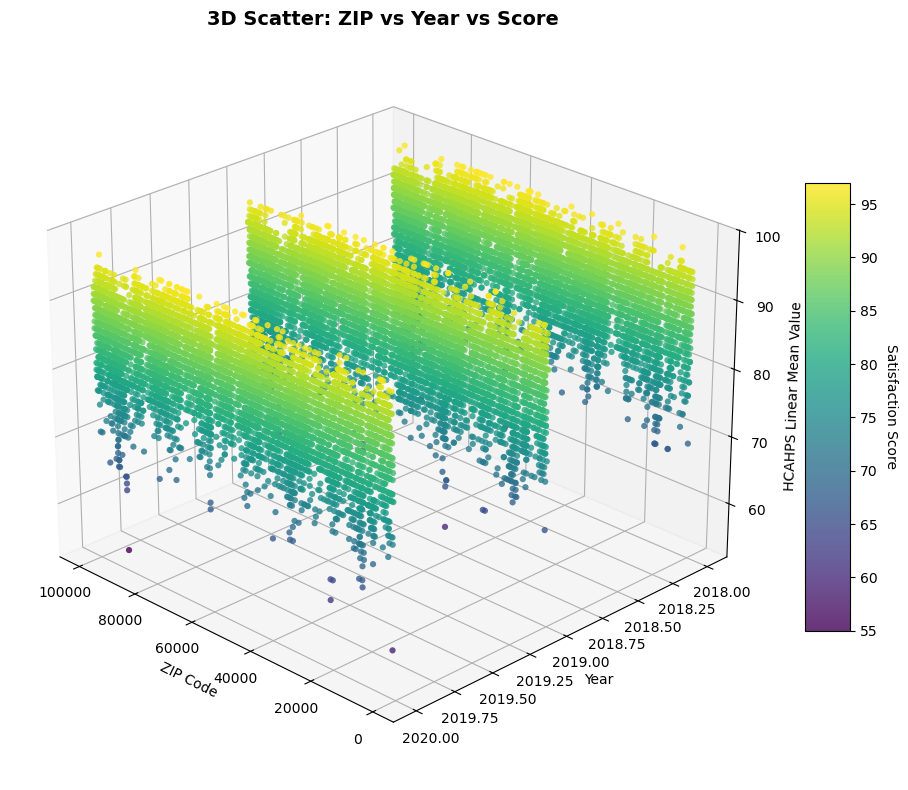

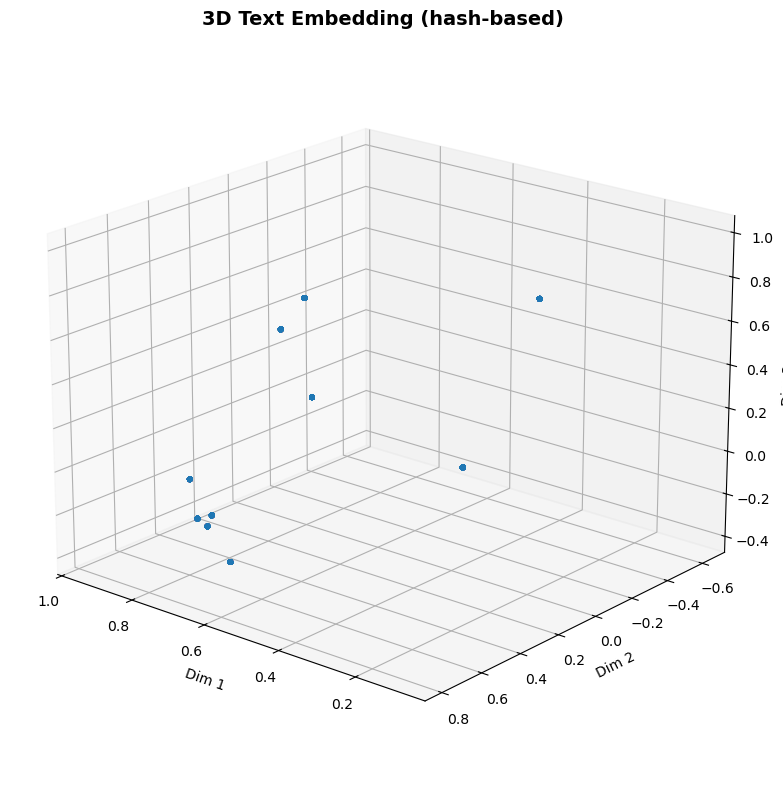

Preparing index structures...
[DBG] POINT_ID_MAP: n_pairs=17391, sample=((46350, 2020, 84.0), '0')
Building indexes (spatial + LSH)...

KD+LSH:
Spatial index build: 0.00s, Memory: 1263.55 MB
LSH index build: 1.51s

Octree+LSH:
Spatial index build: 0.58s, Memory: 1416.02 MB
LSH index build: 1.49s

Range+LSH:
Spatial index build: 0.00s, Memory: 1558.60 MB
LSH index build: 1.46s

RTree+LSH:
Spatial index build: 6.57s, Memory: 1710.16 MB
LSH index build: 1.56s

Evaluating queries...
[DBG] EVAL_SETUP: n=18324, test_points=3
[DBG] RANGES: zip_range=(674.0, 99901.0), year_range=(2018.0, 2020.0), score_range=(55.0, 97.0)

Testing KD+LSH...
kNN: 0.016s
Range: 0.088s
Text (all corpus, 20q): 2.154s
Text after spatial+backfill (20q): 1.729s
  -> mean allowed size: 9162.0 (50.0% of corpus=18324)

Testing Octree+LSH...
kNN: 0.000s
Range: 0.065s
Text (all corpus, 20q): 2.069s
Text after spatial+backfill (20q): 1.555s
  -> mean allowed size: 9162.0 (50.0% of corpus=18324)

Testing Range+LSH...
kNN: 0.

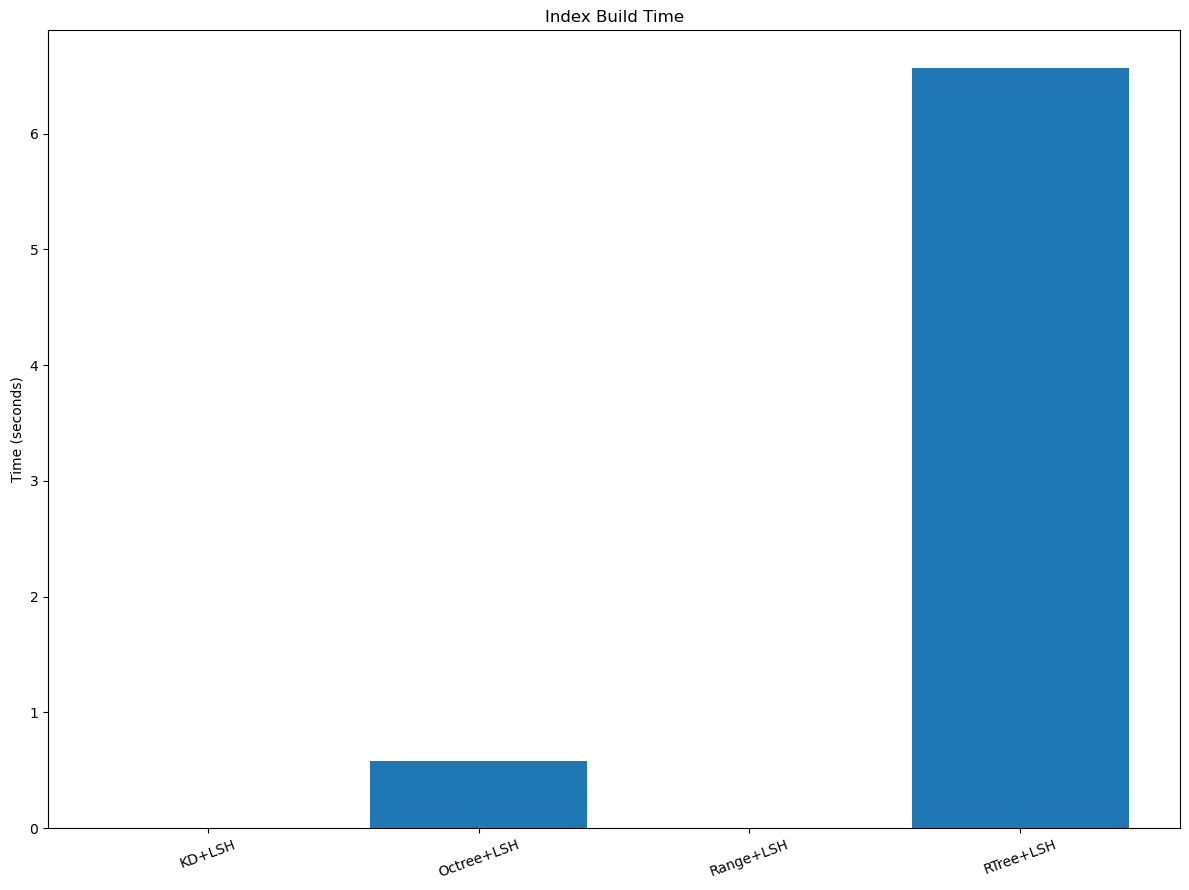

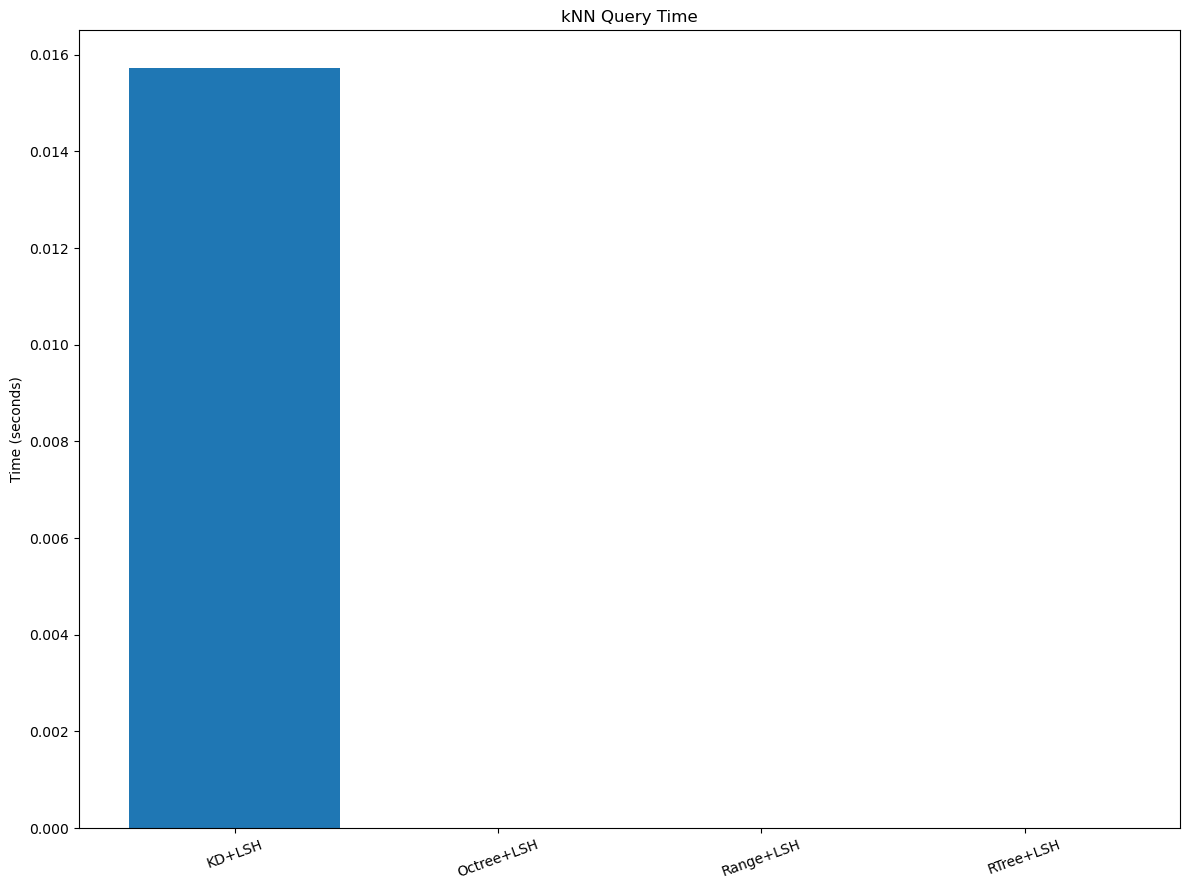

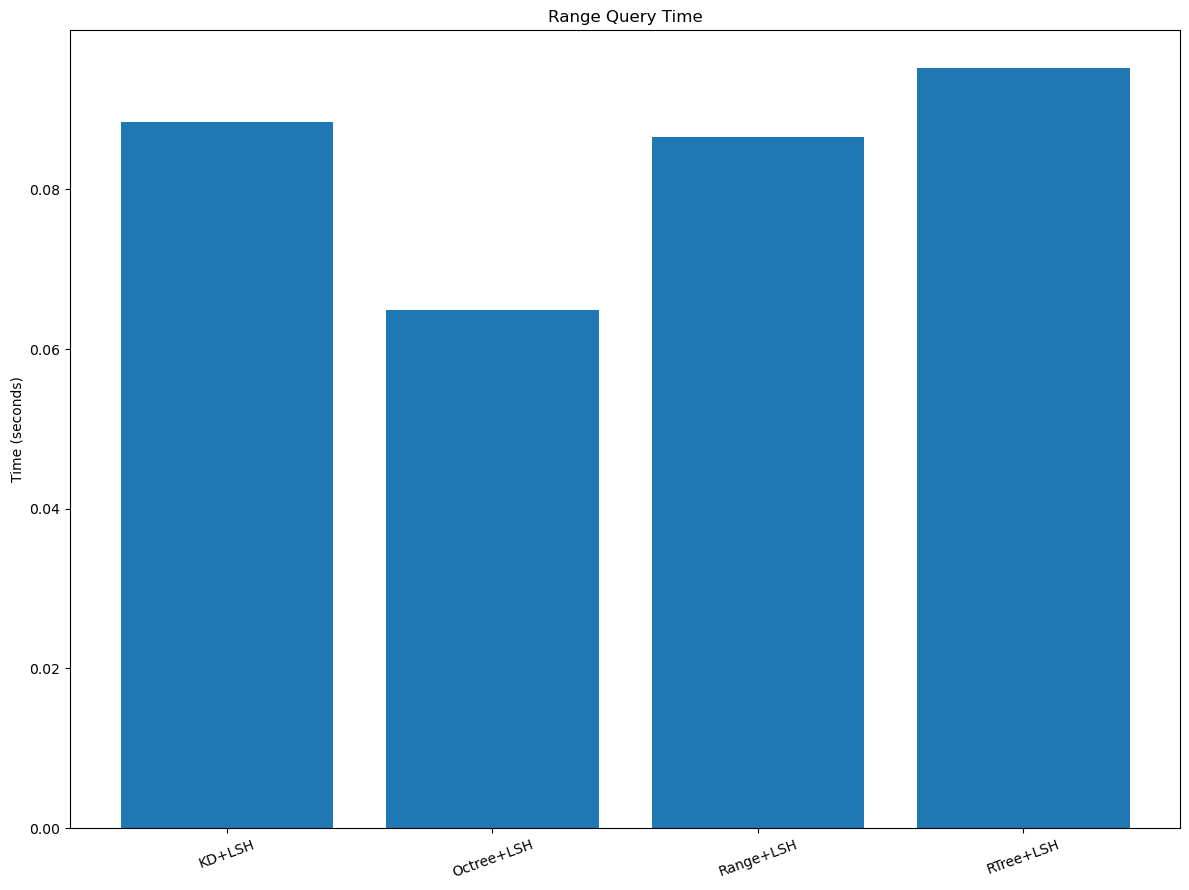

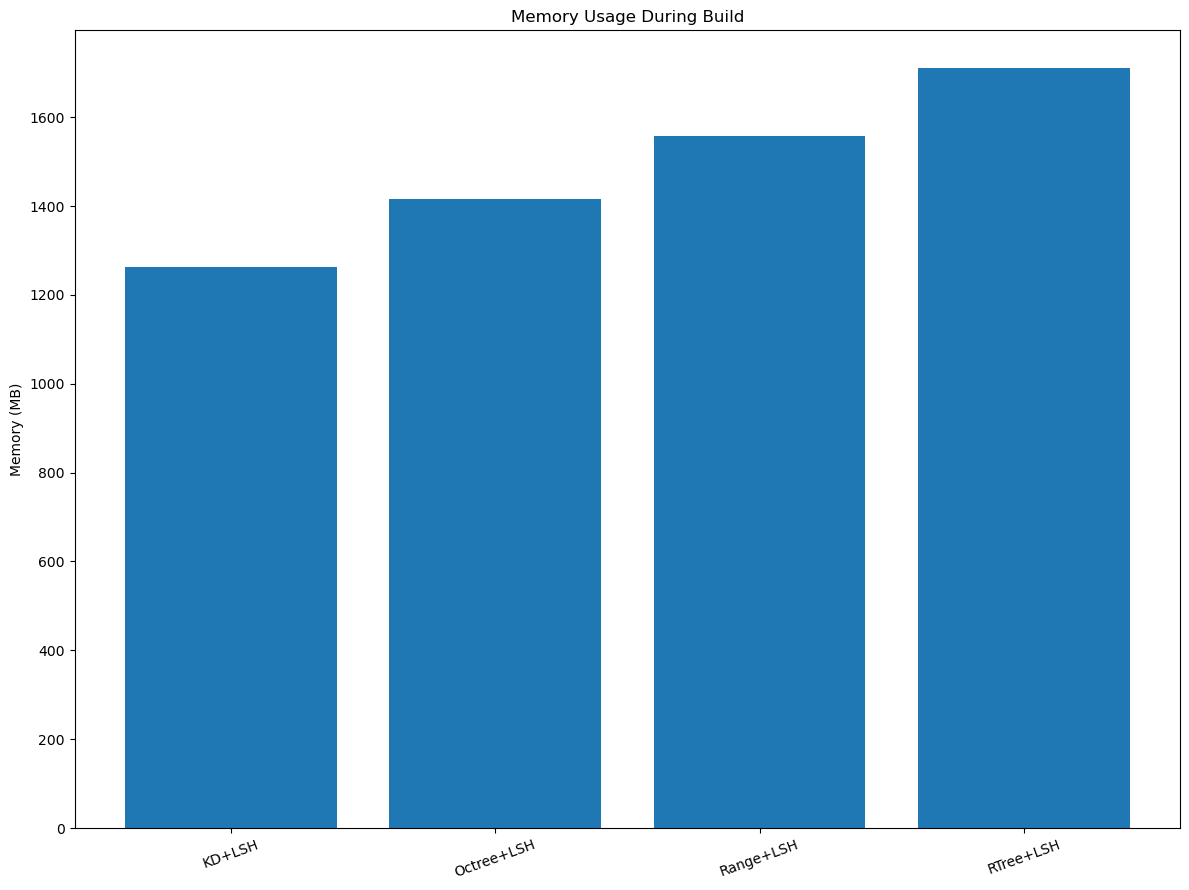

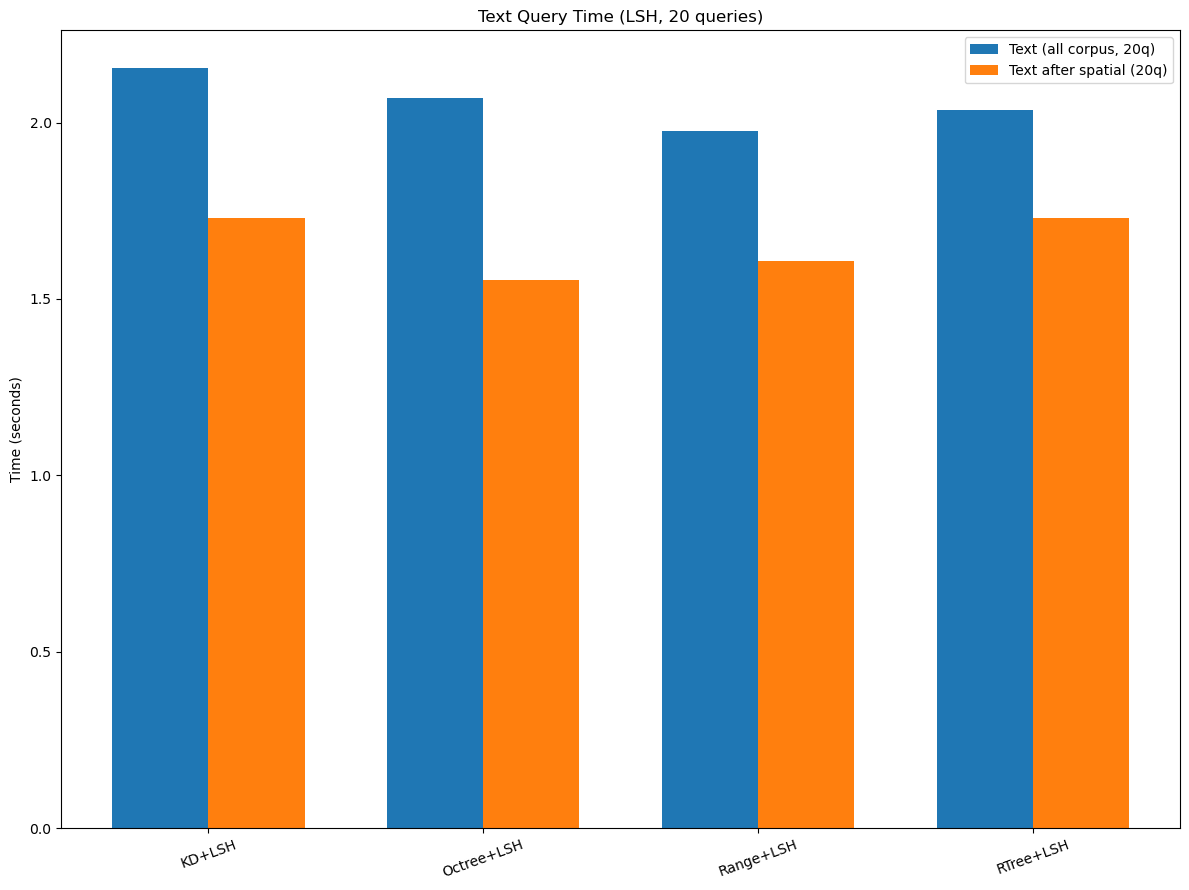


Summary:

KD+LSH:
Avg build time: 0.000 s
Avg kNN query time: 0.016 s
Avg range query time: 0.088 s
Avg text (all corpus, 20q): 2.154 s
Avg text (after spatial, 20q): 1.729 s
Avg memory usage: 1263.6 MB

Octree+LSH:
Avg build time: 0.576 s
Avg kNN query time: 0.000 s
Avg range query time: 0.065 s
Avg text (all corpus, 20q): 2.069 s
Avg text (after spatial, 20q): 1.555 s
Avg memory usage: 1416.0 MB

Range+LSH:
Avg build time: 0.000 s
Avg kNN query time: 0.000 s
Avg range query time: 0.087 s
Avg text (all corpus, 20q): 1.977 s
Avg text (after spatial, 20q): 1.608 s
Avg memory usage: 1558.6 MB

RTree+LSH:
Avg build time: 6.565 s
Avg kNN query time: 0.000 s
Avg range query time: 0.095 s
Avg text (all corpus, 20q): 2.035 s
Avg text (after spatial, 20q): 1.729 s
Avg memory usage: 1710.2 MB


In [19]:
import warnings
import time
import re
from collections import defaultdict
from typing import Any, Iterable, List, Tuple, Dict, Optional

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Απλός tokenizer για οπτικοποίηση, o οποίος επιστρέφει λέξεις/αλφαριθμητικά σε lower.
def whitespace_tokenize(text: str) -> List[str]:
    if not isinstance(text, str): # Αν δεν είναι string, επέστρεψε κενό
        return []
    return re.findall(r"\w+", text.lower()) # Βρες λέξη-κανονική έκφραση (\w+) σε πεζά

# Tokenizer για LSH/MinHash.
# - use_char_ngrams=True: παράγει char-ngrams μήκους n πάνω στο κείμενο.
# - use_char_ngrams=False: επιστρέφει λέξεις (word tokens).
def tokenize_text(text: str, use_char_ngrams: bool = True, n: int = 3) -> List[str]:
    if not isinstance(text, str):
        return []
    t = text.lower().strip() 
    if not t:
        return []
    if use_char_ngrams: # Συμπίεση whitespace σε μονό κενό
        t = re.sub(r"\s+", " ", t) 
        if len(t) < n: # Για πολύ μικρό string, επέστρεψε ως έχει
            return [t]
        return [t[i:i+n] for i in range(len(t) - n + 1)] # Ολίσθηση παραθύρου για n-γράμματα
    return whitespace_tokenize(t) # Αλλιώς γύρνα σε word tokens

# Επιστρέφει κατά προσέγγιση τη χρήση μνήμης σε MB
def memory_usage_mb() -> float:
    try:
        import os, psutil  
        process = psutil.Process(os.getpid())
        return float(process.memory_info().rss) / (1024.0 * 1024.0)
    except Exception:
        return 0.0


# --- LSH INDEX 

# Wrapper γύρω από datasketch.MinHashLSH:
# - Αποθηκεύει MinHash ανά doc_id
# - Επιτρέπει LSH bucket queries (υποψήφια όμοια με υψηλή πιθανότητα)
class LSHIndex:

    def __init__(self, num_perm: int = 128, threshold: float = 0.3) -> None:
        self.num_perm = num_perm  # Πλήθος permutations στο MinHash
        self.threshold = threshold # Κατώφλι ομοιότητας (Jaccard approx)
        self.doc_tokens: Dict[str, List[str]] = {} # Tokens ανά doc_id (προαιρετικό)
        self.doc_token_sets: Dict[str, set] = {} # Σύνολο tokens ανά doc_id (για exact)
        self.doc_minhash: Dict[str, Any] = {}  # MinHash ανά doc_id

        # Δημιουργία πραγματικού LSH ευρετηρίου
        try:
            from datasketch import MinHashLSH  
        except Exception as e:
            raise RuntimeError("Απαιτείται 'datasketch' (pip install datasketch).") from e
        self.lsh = MinHashLSH(threshold=self.threshold, num_perm=self.num_perm)

    def add_document_minhash(self, doc_id: str, mhash: Any, tokens: Optional[List[str]] = None) -> None:
        self.doc_minhash[doc_id] = mhash # Αποθήκευση MinHash και (προαιρετικά) tokens
        if tokens is not None:
            self.doc_tokens[doc_id] = list(tokens)
            self.doc_token_sets[doc_id] = set(tokens)
        self.lsh.insert(doc_id, mhash) # Εισαγωγή στο LSH buckets index

    def query(self, mhash: Any) -> List[str]:
        return list(self.lsh.query(mhash)) # Επιστρέφει doc_ids από τα LSH buckets (υποψήφιοι με υψηλή πιθανότητα ομοιότητας)


# --- PERFORMANCE EVALUATOR 

class PerformanceEvaluator:
    def __init__(
        self,
        features: np.ndarray,            # (n,3) -> [ZIP, Year, Score]
        feedbacks: List[str],
        indices: List[int],
        full_df: pd.DataFrame,
        debug: bool = True
    ) -> None:
        import traceback as _tb
        self._traceback = _tb
        self.debug = debug

        if features.ndim != 2 or features.shape[1] != 3: # Έλεγχος σχήματος, αναμένουμε Nx3
            raise ValueError(f"Το features πρέπει να είναι Nx3. Shape: {features.shape}")
        self.features = features.astype(float, copy=False)
        self.feedbacks = feedbacks
        self.indices = indices
        self.df = full_df.reset_index(drop=True)
        self.results: Dict[str, Dict[str, List[float]]] = defaultdict(lambda: defaultdict(list)) # Αποτελέσματα αξιολόγησης ανά δείκτη/μετρική

        # Ρυθμίσεις LSH
        self.num_perm = 128
        self.use_char_ngrams = True
        self.char_ngram_n = 3

        # Ρυθμίσεις χωρικού pruning
        self.spatial_knn_k = 150
        self.local_zip_delta = 600.0
        self.local_year_delta = 1.0
        self.local_score_delta = 0.75
        self.union_allowed_sets = True

        # Exact Rerank
        self.exact_pool = -1

        # Backfill
        self.min_allowed_abs = 500
        self.min_allowed_frac = 1.0         # θα ρυθμιστεί από main()
        self.enable_lsh_backfill = True
        self.include_lsh_topk_in_allowed = 100

        # Αν είναι True, παρακάμπτει το spatial και χρησιμοποιεί ΟΛΟ το corpus
        self.force_full_allowed = True  # θα γίνει False από main() για πραγματικό pruning

        # Εσωτερικές δομές
        self.point_to_doc_id: Dict[Tuple[float, float, float], str] = {}
        self.doc_ids: List[str] = [str(i) for i in self.indices]
        self.doc_tokens: Dict[str, List[str]] = {}
        self.doc_token_sets: Dict[str, set] = {}
        self.doc_minhash: Dict[str, Any] = {}

        self._dbg("INIT",
                  features_shape=self.features.shape,
                  n_feedbacks=len(self.feedbacks),
                  n_indices=len(self.indices),
                  df_len=len(self.df))

        self._precompute_text_structures() # Προϋπολογισμοί κειμένου (tokens + MinHash) μια φορά

    # Debug Helper 
    def _dbg(self, where: str, **kv):
        if not self.debug:
            return
        payload = ", ".join(f"{k}={v}" for k, v in kv.items())
        print(f"[DBG] {where}: {payload}")

    def _warn(self, where: str, msg: str):
        print(f"[WRN] {where}: {msg}")

    def _err(self, where: str, exc: Exception):
        print(f"[ERR] {where}: {type(exc).__name__}: {exc}")
        try:
            print(self._traceback.format_exc())
        except Exception:
            pass

    # Προϋπολογισμοί LSH (ΜΙΑ φορά) 
    def _precompute_text_structures(self) -> None:
        self._dbg("PRECOMPUTE_TEXT_START", # Tokenize όλων των feedbacks + δημιουργία MinHash υπογραφών
                  num_perm=self.num_perm,
                  use_char_ngrams=self.use_char_ngrams,
                  n=self.char_ngram_n,
                  n_docs=len(self.doc_ids))
        try:
            from datasketch import MinHash  
        except Exception as e:
            self._err("_precompute_text_structures/import", e)
            raise RuntimeError("Απαιτείται 'datasketch' (pip install datasketch).")

        try: # Tokenize όλων των κειμένων
            toks: List[List[str]] = [tokenize_text(t, self.use_char_ngrams, self.char_ngram_n) for t in self.feedbacks]
            self.doc_tokens = {doc_id: tok for doc_id, tok in zip(self.doc_ids, toks)}
            self.doc_token_sets = {doc_id: set(tok) for doc_id, tok in zip(self.doc_ids, toks)}
            empty_docs = [d for d, ts in self.doc_tokens.items() if not ts] # Αναφορά για κενές εγγραφές μετά το tokenize
            if empty_docs:
                self._warn("PRECOMPUTE_TEXT_EMPTY_DOCS",
                           f"empty tokenized docs: {len(empty_docs)} (showing first 5) {empty_docs[:5]}")

            dm: Dict[str, Any] = {} # Δημιουργία MinHash για κάθε έγγραφο
            for i, (doc_id, tok) in enumerate(self.doc_tokens.items()):
                if i % 5000 == 0 and i > 0:
                    self._dbg("PRECOMPUTE_TEXT_PROGRESS", processed=i)
                m = MinHash(num_perm=self.num_perm)
                for t in tok:
                    try:
                        m.update(t.encode("utf8"))
                    except Exception as e:
                        self._err("MinHash.update", e)
                dm[doc_id] = m
            self.doc_minhash = dm
            self._dbg("PRECOMPUTE_TEXT_DONE", n_minhash=len(self.doc_minhash))
        except Exception as e:
            self._err("_precompute_text_structures", e)
            raise

    # Στρογγυλοποίηση
    def _round3(self, t: Tuple[float, float, float]) -> Tuple[float, float, float]:
        # ZIP/Year ~ ακέραια, Score με 2 δεκαδικά, και μειώνει float mismatches
        return (round(t[0]), round(t[1]), round(t[2], 2))

    # Map 3D σημείων -> doc_id
    def _make_point_id_map(self) -> None:
        try:
            self.point_to_doc_id = {
                self._round3(tuple(map(float, pt))): str(idx)
                for pt, idx in zip(self.features, self.indices)
            }
            self._dbg("POINT_ID_MAP",
                      n_pairs=len(self.point_to_doc_id),
                      sample=(next(iter(self.point_to_doc_id.items()))
                              if self.point_to_doc_id else None))
        except Exception as e:
            self._err("_make_point_id_map", e)
            raise

    # Κανονικοποίηση διαφόρων μορφών σημείων στην τριπλέτα (z,y,s) με στρογγυλοποίηση
    def _normalize_points(self, pts: Iterable[Any]) -> List[Tuple[float, float, float]]:
        out = []
        for p in pts or []:
            if isinstance(p, dict) and "coords" in p:
                c = p["coords"]
            elif isinstance(p, (list, tuple)) and len(p) == 3:
                c = p
            else:
                continue
            out.append(self._round3((float(c[0]), float(c[1]), float(c[2]))))
        return out

    # k-NN πάνω στο χωρικό ευρετήριο και αντιστοίχιση σε doc_ids
    def _spatial_knn_ids(self, name: str, spatial_index: Any, tp: Tuple[float, float, float], k: int) -> List[str]:
        try:
            if "Octree" in name: # Διαφορετικές υπογραφές κλήσης ανά υλοποίηση
                pts = spatial_index.kNN(list(tp), k=k)
            else:
                pts = spatial_index.kNN(tp, k=k)
            norm_pts = self._normalize_points(pts)
            ids = [self.point_to_doc_id.get(p) for p in norm_pts if p in self.point_to_doc_id]
            missing = len(norm_pts) - len(ids)
            if missing > 0:
                self._warn("_spatial_knn_ids",
                           f"missing ids for {missing} normalized points (maybe float mismatch?)")
            return [i for i in ids if i is not None]
        except Exception as e:
            self._err("_spatial_knn_ids", e)
            return []

    # Range query σε χωρικό δείκτη -> doc_ids
    def _spatial_range_ids(self, name: str, spatial_index: Any,
                           zip_range: Tuple[float, float],
                           year_range: Tuple[float, float],
                           score_range: Tuple[float, float]) -> List[str]:
        try:
            if "KD" in name or "Range" in name:
                pts = spatial_index.range_query([zip_range, year_range, score_range])
            elif "Octree" in name:
                pts = spatial_index.range_query(
                    [zip_range[0], year_range[0], score_range[0]],
                    [zip_range[1], year_range[1], score_range[1]]
                )
            elif "RTree" in name:
                pts = spatial_index.range_query(zip_range, year_range, score_range)
            else:
                pts = []
            norm_pts = self._normalize_points(pts)
            ids = [self.point_to_doc_id.get(p) for p in norm_pts if p in self.point_to_doc_id]
            return [i for i in ids if i is not None]
        except Exception as e:
            self._err("_spatial_range_ids", e)
            return []

    # Τοπικός κύβος γύρω από center για zip/year/score
    def _local_range_ids(self, name: str, spatial_index: Any,
                         center: Tuple[float, float, float],
                         dz: float, dy: float, ds: float) -> List[str]:
        zc, yc, sc = center
        return self._spatial_range_ids(
            name, spatial_index,
            (zc - dz, zc + dz),
            (yc - dy, yc + dy),
            (sc - ds, sc + ds)
        )

    # LSH βοηθητικές συναρτήσεις 

    # Δημιουργεί MinHash για query_text και επιστρέφει (tokens, minhash)
    def _query_minhash(self, query_text: str):
        try:
            from datasketch import MinHash  # type: ignore
            q_tokens = tokenize_text(query_text, self.use_char_ngrams, self.char_ngram_n)
            if not q_tokens:
                self._warn("_query_minhash", "empty tokens from query")
                return None, None
            q_m = MinHash(num_perm=self.num_perm)
            for t in q_tokens:
                try:
                    q_m.update(t.encode("utf8"))
                except Exception as e:
                    self._err("q_m.update", e)
            return q_tokens, q_m
        except Exception as e:
            self._err("_query_minhash", e)
            return None, None

    # O(N) baseline: approx Jaccard query_minhash vs ΟΛΑ τα έγγραφα (για σύγκριση)
    def _lsh_candidates_all(self, q_m: Any) -> List[Tuple[str, float]]:
        try:
            pairs = [(doc_id, float(q_m.jaccard(self.doc_minhash[doc_id])))
                     for doc_id in self.doc_ids]
            pairs.sort(key=lambda x: x[1], reverse=True)
            return pairs
        except Exception as e:
            self._err("_lsh_candidates_all", e)
            return []

    # Exact επαναταξινόμηση (Jaccard σε σύνολα tokens)
    def _exact_rerank(self, q_tokens: List[str], approx_pairs: List[Tuple[str, float]], exact_pool: int) -> List[Tuple[str, float]]:
        try:
            if exact_pool is None or exact_pool <= 0 or exact_pool > len(approx_pairs):
                pool = approx_pairs
            else:
                pool = approx_pairs[:exact_pool]

            q_set = set(q_tokens or [])
            approx_d = {doc_id: score for doc_id, score in pool}  # for secondary tie-break

            out = []
            for doc_id, _ in pool:
                dset = self.doc_token_sets.get(doc_id, set())
                inter = len(q_set & dset)
                union = len(q_set) + len(dset) - inter
                sim_exact = 0.0 if union == 0 else inter / union
                out.append((doc_id, float(sim_exact)))

            out.sort(key=lambda x: (-x[1], -approx_d.get(x[0], 0.0), int(x[0]) if x[0].isdigit() else x[0]))
            return out
        except Exception as e:
            self._err("_exact_rerank", e)
            return approx_pairs[:5] if approx_pairs else []

    # Επιστρέφει top-N doc_ids με LSH-only (baseline) + optional exact rerank pool
    def _lsh_topn_all(self, query_text: str, top_n: int = 5, exact_pool: int | None = None) -> List[str]:
        q_tokens, q_m = self._query_minhash(query_text)
        if q_m is None:
            return []
        approx = self._lsh_candidates_all(q_m)
        exact_ranked = self._exact_rerank(q_tokens, approx, -1 if exact_pool is None else exact_pool)
        out = [p[0] for p in exact_ranked[:top_n]]
        if not out:
            self._warn("_lsh_topn_all", f"no results for query='{query_text[:40]}...'")
        return out

    # Backfill φέρνουμε υποψηφίους από LSH buckets αντί για O(N) σάρωση
    def _augment_allowed_with_lsh(
        self,
        allowed_set: set,
        q_m: Any,
        lsh_index: LSHIndex,
        budget_target: int,
        include_topk: int = 0,
        order_index: Optional[Dict[str, int]] = None
    ) -> set:
        try:
            cand_ids = lsh_index.query(q_m) if hasattr(lsh_index, "query") else []
        except Exception as e:
            self._err("_augment_allowed_with_lsh/query", e)
            cand_ids = []

        approx_pairs = [] # Υπολογισμός approx score ΜΟΝΟ στους bucket candidates
        for doc_id in cand_ids:
            mh = lsh_index.doc_minhash.get(doc_id)
            if mh is None:
                continue
            approx_pairs.append((doc_id, float(q_m.jaccard(mh))))
        approx_pairs.sort(key=lambda x: x[1], reverse=True)

        if include_topk > 0 and approx_pairs: # Προαιρετικά βάλε τους top-k από τα buckets
            for doc_id, _ in approx_pairs[:include_topk]:
                allowed_set.add(doc_id)

        # Συμπλήρωσε μέχρι το budget από την (ήδη ταξινομημένη) λίστα bucket candidates
        i = 0
        while len(allowed_set) < budget_target and i < len(approx_pairs):
            allowed_set.add(approx_pairs[i][0])
            i += 1

        # Αν ακόμη δεν έφτασε το budget (λίγα buckets), κάνε deterministic padding χωρίς jaccard
        if len(allowed_set) < budget_target:
            # Χρησιμοποίησε τη γνωστή σειρά doc_ids (order_index) ώστε να είναι αναπαραγώγιμο.
            all_ids = self.doc_ids
            if order_index:
                all_ids = sorted(all_ids, key=lambda d: order_index.get(d, 10**12))
            for d in all_ids:
                if len(allowed_set) >= budget_target:
                    break
                if d not in allowed_set:
                    allowed_set.add(d)

        return allowed_set

    # LSH query εντός συγκεκριμένης λίστας allowed_doc_ids με exact rerank
    def _lsh_query_within(self, query_text: str, allowed_doc_ids: List[str], top_n: int = 5,
                          rerank_exact: bool = True, exact_pool: int | None = None):
        q_tokens, q_m = self._query_minhash(query_text)
        if q_m is None:
            return []
        # Φιλτράρισμα allowed βάσει υπαρχόντων MinHash κλειδιών, κράτησε αρχική σειρά
        allowed = list(dict.fromkeys([a for a in allowed_doc_ids if a in self.doc_minhash]))
        if not allowed:
            self._warn("_lsh_query_within", "empty allowed_doc_ids after filtering against doc_minhash keys")
            return []
        try:
            approx = [(doc_id, float(q_m.jaccard(self.doc_minhash[doc_id]))) for doc_id in allowed]
            approx.sort(key=lambda x: x[1], reverse=True)
            if not rerank_exact:
                return approx[:top_n]
            exact_ranked = self._exact_rerank(q_tokens, approx, self.exact_pool if exact_pool is None else exact_pool)
            return exact_ranked[:top_n]
        except Exception as e:
            self._err("_lsh_query_within", e)
            return []

    # Σύντομη προεπισκόπηση πρώτων γραμμών
    def preview_data(self, n: int = 8) -> None:
        print("\n--- Data preview ---")
        total = len(self.features)
        print(f"Total samples: {total}")
        print("Columns: [ZIP Code, Year, HCAHPS Linear Mean Value]")
        for i in range(min(n, total)):
            zc, yr, sc = self.features[i]
            fb = self.feedbacks[i]
            if len(fb) > 120:
                fb = fb[:120] + "…"
            print(f"{i:>3} | ZIP={zc:.0f}, Year={yr:.0f}, Score={sc:.2f} | df_idx={self.indices[i]} | '{fb}'")

    # Hash-based 3D embeddings για visualization
    def _text_hash_embed_3d(self, texts: List[str], dim: int = 3) -> np.ndarray:
        def tok_vec(tok: str) -> np.ndarray:
            h = abs(hash(tok)) % (2**32)
            local = np.random.RandomState(h ^ 0x9E3779B9)
            v = local.normal(size=dim)
            n = np.linalg.norm(v)
            return v if n == 0 else v / n
        X = np.zeros((len(texts), dim), dtype=float)
        for i, txt in enumerate(texts):
            toks = whitespace_tokenize(txt)  # μόνο για visualization
            if not toks:
                continue
            s = np.zeros(dim, dtype=float)
            for t in toks:
                s += tok_vec(t)
            n = np.linalg.norm(s)
            X[i] = s if n == 0 else s / n
        return X

    # 3D scatter (ZIP, Year, Score)
    def visualize_data_3d(self) -> None:
        from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
        X = self.features
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X[:, 2], cmap='viridis', s=20, alpha=0.8, edgecolor='none')
        ax.set_title('3D Scatter: ZIP vs Year vs Score', fontsize=14, fontweight='bold')
        ax.set_xlabel('ZIP Code'); ax.set_ylabel('Year'); ax.set_zlabel('HCAHPS Linear Mean Value')
        ax.grid(True); ax.view_init(elev=25, azim=135)
        cb = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=10); cb.set_label('Satisfaction Score', rotation=270, labelpad=15)
        plt.tight_layout(); plt.show()

    # 3D scatter για πρόχειρο embedding κειμένου (hash-based)
    def visualize_text_3d(self, sample: int = 1000) -> None:
        n = len(self.feedbacks)
        if n == 0:
            return
        sel = np.arange(n) if n <= sample else np.random.default_rng(0).choice(n, size=sample, replace=False)
        texts = [self.feedbacks[i] for i in sel]
        emb = self._text_hash_embed_3d(texts, dim=3)
        from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(emb[:, 0], emb[:, 1], emb[:, 2], s=10, alpha=0.8)
        ax.set_title('3D Text Embedding (hash-based)', fontsize=14, fontweight='bold')
        ax.set_xlabel('Dim 1'); ax.set_ylabel('Dim 2'); ax.set_zlabel('Dim 3')
        ax.grid(True); ax.view_init(elev=20, azim=130)
        plt.tight_layout(); plt.show()

    # Δημιουργία χωρικών δομών + LSH ευρετηρίων
    def build_indexes(self) -> Dict[str, Tuple[Any, Any]]:
        print("Preparing index structures...")
        xyz = self.features
        points3d = [tuple(row) for row in xyz]
        min_xyz = xyz.min(axis=0); max_xyz = xyz.max(axis=0)
        root_center = list((min_xyz + max_xyz) / 2); root_size = float(np.max(max_xyz - min_xyz))

        self._make_point_id_map() # Map σημείων σε doc_ids (για γρήγορη αναφορά)

        indexes: Dict[str, Tuple[Any, Any]] = {} # Προσπαθούμε να χρησιμοποιήσουμε διαθέσιμες υλοποιήσεις στο περιβάλλον

        # KD+LSH
        try:
            KDTree  
            indexes['KD+LSH'] = (KDTree(points3d), LSHIndex(num_perm=self.num_perm, threshold=0.3))  # type: ignore
        except Exception:
            pass

        # Octree+LSH
        try:
            Octree  
            indexes['Octree+LSH'] = (Octree(root_center, root_size, max_points_per_node=8),  # type: ignore
                                     LSHIndex(num_perm=self.num_perm, threshold=0.3))
        except Exception:
            pass

        # Range+LSH
        try:
            RangeTree  # type: ignore[name-defined]
            indexes['Range+LSH'] = (RangeTree(points3d), LSHIndex(num_perm=self.num_perm, threshold=0.3))  # type: ignore
        except Exception:
            pass

        # RTree+LSH
        try:
            RTree3D  # type: ignore[name-defined]
            indexes['RTree+LSH'] = (RTree3D(max_entries=16), LSHIndex(num_perm=self.num_perm, threshold=0.3))  # type: ignore
        except Exception:
            pass

        if not indexes:
            self._warn("build_indexes", "Δεν βρέθηκε καμία χωρική δομή (KD/Octree/Range/RTree). Θα συνεχίσουμε μόνο με LSH.")

        print("Building indexes (spatial + LSH)...")
        for name, (spatial_index, lsh_index) in indexes.items():
            print(f"\n{name}:")
            # Build spatial
            try:
                start = time.time()
                if name.startswith("Octree"):
                    for idx, pt in enumerate(points3d):
                        spatial_index.insert({'coords': list(pt), 'data': self.indices[idx]})
                        if idx and idx % 20000 == 0:
                            self._dbg("Octree.insert.progress", inserted=idx)
                elif name.startswith("RTree"):
                    for idx, pt in enumerate(points3d):
                        try:
                            spatial_index.insert(*pt)
                        except Exception:
                            spatial_index.insert({'coords': list(pt), 'data': self.indices[idx]})
                        if idx and idx % 20000 == 0:
                            self._dbg("RTree.insert.progress", inserted=idx)
                # KD/Range typically built in ctor
                build_time = time.time() - start
                mem_usage = memory_usage_mb()
                print(f"Spatial index build: {build_time:.2f}s, Memory: {mem_usage:.2f} MB")
                self.results[name]['build_time'].append(build_time)
                self.results[name]['build_memory'].append(mem_usage)
            except Exception as e:
                self._err("build_indexes/spatial_build", e)
                self.results[name]['build_time'].append(float('nan'))
                self.results[name]['build_memory'].append(memory_usage_mb())

            # Build LSH (εισαγωγή όλων των MinHash στο LSH buckets index)
            try:
                start = time.time()
                if hasattr(lsh_index, "add_document_minhash"):
                    for i, doc_id in enumerate(self.doc_ids):
                        lsh_index.add_document_minhash(doc_id, self.doc_minhash[doc_id],
                                                       tokens=list(self.doc_token_sets[doc_id]))
                        if i and i % 20000 == 0:
                            self._dbg("LSH.add_document_minhash.progress", inserted=i)
                lsh_time = time.time() - start
                print(f"LSH index build: {lsh_time:.2f}s")
                self.results[name]['lsh_build_time'].append(lsh_time)
            except Exception as e:
                self._err("build_indexes/LSH_build", e)
                self.results[name]['lsh_build_time'].append(float('nan'))

        return indexes

    # Default λίστα από queries για δοκιμή LSH
    def _default_text_queries(self) -> List[str]:
        return [
            "cleanliness linear mean room always clean",
            "nurses always communicated well",
            "room was usually clean",
            "doctor explained things clearly",
            "communication about medicines",
            "discharge information provided",
            "staff responsiveness linear mean",
            "quietness of hospital environment",
            "pain management satisfaction",
            "care transition rating",
            "hospital rating nine or ten",
            "would recommend hospital yes",
            "nurse courtesy and respect",
            "doctor listened carefully",
            "help after call button pressed",
            "room and bathroom cleanliness",
            "area around room quiet at night",
            "medications side effects explained",
            "understood discharge instructions",
            "overall patient satisfaction score",
        ]

    # Αξιολόγηση queries: kNN, Range, LSH baseline, Spatial-first + LSH backfill
    def evaluate_queries(self, indexes: Dict[str, Tuple[Any, Any]]) -> None:
        print("\nEvaluating queries...")
        n = len(self.features)
        if n == 0:
            print("No data to evaluate."); return

        sel = [0, n // 3, (2 * n) // 3] if n >= 3 else list(range(n))
        test_points3d = [tuple(self.features[i]) for i in sel]
        self._dbg("EVAL_SETUP", n=n, test_points=len(test_points3d))

        zip_range   = (float(self.features[:, 0].min()), float(self.features[:, 0].max()))
        year_range  = (float(self.features[:, 1].min()), float(self.features[:, 1].max()))
        score_range = (float(self.features[:, 2].min()), float(self.features[:, 2].max()))
        self._dbg("RANGES", zip_range=zip_range, year_range=year_range, score_range=score_range)

        text_queries = self._default_text_queries()
        corpus_size = len(self.doc_ids)
        order_index = {d: i for i, d in enumerate(self.doc_ids)}  # για σταθερή σειρά

        for name, (spatial_index, lsh_index) in indexes.items():
            print(f"\nTesting {name}...")

            # kNN
            try:
                start = time.time()
                for tp in test_points3d:
                    ids = self._spatial_knn_ids(name, spatial_index, tp, k=10)
                    if not ids:
                        self._warn("kNN.empty", f"{name}: got 0 ids for tp={tp}")
                knn_time = time.time() - start
                self.results[name]['knn_time'].append(knn_time)
                print(f"kNN: {knn_time:.3f}s")
            except Exception as e:
                self._err("evaluate_queries/kNN", e)
                self.results[name]['knn_time'].append(float('nan'))

            # Range
            try:
                start = time.time()
                got = self._spatial_range_ids(name, spatial_index, zip_range, year_range, score_range)
                if not got:
                    self._warn("Range.empty", f"{name}: got 0 ids for full range")
                range_time = time.time() - start
                self.results[name]['range_time'].append(range_time)
                print(f"Range: {range_time:.3f}s")
            except Exception as e:
                self._err("evaluate_queries/range", e)
                self.results[name]['range_time'].append(float('nan'))

            # Text baseline (όλο το corpus) – O(N), μόνο για μέτρηση/σύγκριση
            try:
                start = time.time()
                for q in text_queries:
                    _ = self._lsh_topn_all(q, top_n=5, exact_pool=-1)
                text_time_all = time.time() - start
                self.results[name]['text_time_all'].append(text_time_all)
                print(f"Text (all corpus, 20q): {text_time_all:.3f}s")
            except Exception as e:
                self._err("evaluate_queries/text_all", e)
                self.results[name]['text_time_all'].append(float('nan'))

            # Spatial-first (+ LSH bucket backfill)
            try:
                start = time.time()
                total_allowed_counts = []
                for q in text_queries:
                    if self.force_full_allowed:
                        allowed_list = list(self.doc_ids)  # ordered
                    else:
                        knn_ids, local_ids = set(), set()
                        for tp in test_points3d:
                            knn_ids.update(self._spatial_knn_ids(name, spatial_index, tp, k=self.spatial_knn_k))
                            local_ids.update(self._local_range_ids(
                                name, spatial_index, tp,
                                dz=self.local_zip_delta, dy=self.local_year_delta, ds=self.local_score_delta
                            ))
                        if self.union_allowed_sets:
                            allowed = knn_ids | local_ids
                        else:
                            allowed = knn_ids if len(knn_ids) <= len(local_ids) else local_ids

                        _, q_m = self._query_minhash(q)
                        target = max(self.min_allowed_abs, int(self.min_allowed_frac * corpus_size))

                        temp = set(allowed)
                        if self.enable_lsh_backfill and q_m is not None:
                            temp = self._augment_allowed_with_lsh(
                                temp, q_m, lsh_index,
                                budget_target=max(target, len(temp)),
                                include_topk=self.include_lsh_topk_in_allowed,
                                order_index=order_index
                            )
                            if len(temp) < target:
                                temp = self._augment_allowed_with_lsh(
                                    temp, q_m, lsh_index,
                                    budget_target=target,
                                    include_topk=0,
                                    order_index=order_index
                                )
                        allowed_list = sorted(temp, key=lambda d: order_index.get(d, 10**12))

                    total_allowed_counts.append(len(allowed_list))
                    res = self._lsh_query_within(q, allowed_list, top_n=5, rerank_exact=True, exact_pool=-1)
                    if not res:
                        self._warn("spatial_text.empty",
                                   f"{name}: no results for query='{q[:30]}...' allowed={len(allowed_list)}")

                spatial_text_time = time.time() - start
                self.results[name]['spatial_text_time'].append(spatial_text_time)
                cov = (np.mean(total_allowed_counts) / corpus_size) if corpus_size else 0.0
                print(f"Text after spatial+backfill (20q): {spatial_text_time:.3f}s")
                print(f"  -> mean allowed size: {np.mean(total_allowed_counts):.1f} ({cov*100:.1f}% of corpus={corpus_size})")
            except Exception as e:
                self._err("evaluate_queries/spatial_text", e)
                self.results[name]['spatial_text_time'].append(float('nan'))

        # Αποθήκευση για μετέπειτα ελέγχους ακρίβειας
        self._last_indexes = indexes
        self._last_test_points3d = test_points3d

    # Έλεγχοι ακρίβειας
    @staticmethod
    def _jaccard(a: List[str], b: List[str]) -> float:
        sa, sb = set(a), set(b)
        if not sa and not sb:
            return 1.0
        if not sa or not sb:
            return 0.0
        return len(sa & sb) / len(sa | sb)

    @staticmethod
    def _recall_at_n(ref: List[str], cand: List[str]) -> float:
        if not ref:
            return 0.0
        return len(set(ref) & set(cand)) / len(ref)

    # Συγκρίνει Spatial→LSH(+backfill) με LSH-only baseline ως προς recall/Jaccard
    def accuracy_checks(self, top_n: int = 5, queries: List[str] | None = None) -> None:
        if queries is None:
            queries = self._default_text_queries()
        indexes = getattr(self, "_last_indexes", None)
        if indexes is None:
            print("No indexes available for accuracy checks."); return

        print("\n[ACCURACY] Spatial→LSH(+backfill) vs LSH-only (per index) with diagnostics")
        order_index = {d: i for i, d in enumerate(self.doc_ids)}  # deterministic order

        for name, (spatial_index, lsh_index) in indexes.items():
            recs, jacs = [], []
            for q in queries:
                ref = self._lsh_topn_all(q, top_n=top_n, exact_pool=-1)

                if self.force_full_allowed:
                    allowed_list = list(self.doc_ids)
                else:
                    knn_ids, local_ids = set(), set()
                    for tp in self._last_test_points3d:
                        knn_ids.update(self._spatial_knn_ids(name, spatial_index, tp, k=self.spatial_knn_k))
                        local_ids.update(self._local_range_ids(
                            name, spatial_index, tp,
                            dz=self.local_zip_delta, dy=self.local_year_delta, ds=self.local_score_delta
                        ))
                    allowed = (knn_ids | local_ids) if self.union_allowed_sets else (
                              knn_ids if len(knn_ids) <= len(local_ids) else local_ids)
                    _, q_m = self._query_minhash(q)
                    target = max(self.min_allowed_abs, int(self.min_allowed_frac * len(self.doc_ids)))

                    temp = set(allowed)
                    if self.enable_lsh_backfill and q_m is not None:
                        temp = self._augment_allowed_with_lsh(
                            temp, q_m, lsh_index,
                            budget_target=max(target, len(temp)),
                            include_topk=self.include_lsh_topk_in_allowed,
                            order_index=order_index
                        )
                        if len(temp) < target:
                            temp = self._augment_allowed_with_lsh(
                                temp, q_m, lsh_index,
                                budget_target=target,
                                include_topk=0,
                                order_index=order_index
                            )
                    allowed_list = sorted(temp, key=lambda d: order_index.get(d, 10**12))

                pairs = self._lsh_query_within(q, allowed_list, top_n=top_n, rerank_exact=True, exact_pool=-1)
                cand = [p[0] for p in pairs]

                r = self._recall_at_n(ref, cand)
                j = self._jaccard(ref, cand)
                recs.append(r); jacs.append(j)

                if r < 1.0:
                    inter = list(set(ref) & set(cand))
                    print(f"   q='{q[:30]}...'  | baseline={ref}  | spatial={cand}  | overlap={inter}")

            print(f"- {name}: recall@{top_n}={np.mean(recs):.3f}, jaccard={np.mean(jacs):.3f}")

    def visualize_results(self) -> None:
        print("\nGenerating visualizations...")
        labels = list(self.results.keys())
        if not labels:
            print("No results to visualize."); return

        def mean_for(metric: str) -> List[float]:
            return [float(np.mean(self.results[idx][metric])) if self.results[idx][metric] else 0.0
                    for idx in labels]

        # Ράβδοι: χρόνος build
        plt.figure(figsize=(12, 9))
        plt.bar(labels, mean_for('build_time'))
        plt.title('Index Build Time'); plt.ylabel('Time (seconds)')
        plt.xticks(rotation=20); plt.tight_layout(); plt.show()

        # Ράβδοι: χρόνος kNN
        plt.figure(figsize=(12, 9))
        plt.bar(labels, mean_for('knn_time'))
        plt.title('kNN Query Time'); plt.ylabel('Time (seconds)')
        plt.xticks(rotation=20); plt.tight_layout(); plt.show()

        # Ράβδοι: χρόνος Range
        plt.figure(figsize=(12, 9))
        plt.bar(labels, mean_for('range_time'))
        plt.title('Range Query Time'); plt.ylabel('Time (seconds)')
        plt.xticks(rotation=20); plt.tight_layout(); plt.show()

        # Ράβδοι: μνήμη build
        plt.figure(figsize=(12, 9))
        plt.bar(labels, mean_for('build_memory'))
        plt.title('Memory Usage During Build'); plt.ylabel('Memory (MB)')
        plt.xticks(rotation=20); plt.tight_layout(); plt.show()

        # Σύγκριση χρόνου Text queries: all-corpus vs spatial+backfill
        text_all = mean_for('text_time_all')
        text_spatial = mean_for('spatial_text_time')
        x = np.arange(len(labels)); width = 0.35
        plt.figure(figsize=(12, 9))
        plt.bar(x - width/2, text_all, width, label='Text (all corpus, 20q)')
        plt.bar(x + width/2, text_spatial, width, label='Text after spatial (20q)')
        plt.title('Text Query Time (LSH, 20 queries)'); plt.ylabel('Time (seconds)')
        plt.xticks(x, labels, rotation=20); plt.legend(); plt.tight_layout(); plt.show()

        # Σύνοψη με μέσους όρους
        print("\nSummary:")
        for name in labels:
            print(f"\n{name}:")
            print(f"Avg build time: {np.mean(self.results[name]['build_time']):.3f} s")
            print(f"Avg kNN query time: {np.mean(self.results[name]['knn_time']):.3f} s")
            print(f"Avg range query time: {np.mean(self.results[name]['range_time']):.3f} s")
            print(f"Avg text (all corpus, 20q): {np.mean(self.results[name]['text_time_all']):.3f} s")
            print(f"Avg text (after spatial, 20q): {np.mean(self.results[name]['spatial_text_time']):.3f} s")
            print(f"Avg memory usage: {np.mean(self.results[name]['build_memory']):.1f} MB")

    # Κύριος βρόχος αξιολόγησης
    def run_evaluation(self, show_text_3d: bool = True, accuracy_top_n: int = 5):
        self.preview_data()
        self.visualize_data_3d()
        if show_text_3d:
            self.visualize_text_3d(sample=1000)
        indexes = self.build_indexes()
        self.evaluate_queries(indexes)
        self.accuracy_checks(top_n=accuracy_top_n)
        self.visualize_results()
        return self.results


# --- MAIN SCRIPT 
def main():
    warnings.filterwarnings('ignore')
    print("Loading and preprocessing data...")

    df = pd.read_csv("data.csv") # Φόρτωση CSV

    def safe_float(x): # Μετατροπή σε float 
        try:
            return float(x)
        except Exception:
            return np.nan

    # Κανονικοποίηση στηλών
    df['HCAHPS Linear Mean Value'] = df['HCAHPS Linear Mean Value'].apply(safe_float)
    df['ZIP Code'] = pd.to_numeric(df['ZIP Code'], errors='coerce')
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

    # Φίλτρο
    mask = (
        (df['Year'] >= 2018) & (df['Year'] <= 2020) &
        (df['HCAHPS Linear Mean Value'] < 98)
    )
    filtered_df = df[mask].copy()

    # Σύνθεση feedback_text (ερώτηση + απάντηση)
    filtered_df['feedback_text'] = (
        filtered_df['HCAHPS Question'].astype(str).fillna('') + " | " +
        filtered_df['HCAHPS Answer Description'].astype(str).fillna('')
    ).str.strip()

    # Επιλογή καλών γραμμών για features
    good_rows = filtered_df[['ZIP Code', 'Year', 'HCAHPS Linear Mean Value']].notnull().all(axis=1)
    features = filtered_df.loc[good_rows, ['ZIP Code', 'Year', 'HCAHPS Linear Mean Value']].to_numpy()
    feedbacks = filtered_df.loc[good_rows, 'feedback_text'].tolist()
    indices = filtered_df.loc[good_rows].index.to_list()

    print(f"Δεδομένα για ανάλυση: {features.shape[0]} εγγραφές")

    # Δημιουργία evaluator
    evaluator = PerformanceEvaluator(features, feedbacks, indices, filtered_df)

    # --- ΕΝΕΡΓΟΠΟΙΗΣΗ ΧΩΡΙΚΟΥ PRUNING & ΡΥΘΜΙΣΕΙΣ ΓΙΑ ΥΨΗΛΗ ΑΝΑΚΤΗΣΗ 
    evaluator.force_full_allowed = False     # επιτρέπει spatial φιλτράρισμα αντί whole-corpus
    evaluator.spatial_knn_k = 150            # μέγεθος k-NN 
    evaluator.local_zip_delta = 600.0        # τοπικό κουτί γύρω από τα test points
    evaluator.local_year_delta = 1.0
    evaluator.local_score_delta = 0.75
    evaluator.union_allowed_sets = True      # ένωση kNN + local-range
    evaluator.min_allowed_frac = 0.5         # στόχος: ~50% του corpus ως allowed 
    evaluator.min_allowed_abs = 500          # ελάχιστο ταβάνι για μικρά corpora
    evaluator.enable_lsh_backfill = True     # backfill από LSH BUCKETS (όχι full scan)
    evaluator.include_lsh_topk_in_allowed = 50
    evaluator.exact_pool = -1                # exact Ρerank σε όλο το allowed set
    evaluator.use_char_ngrams = True
    evaluator.char_ngram_n = 3

    evaluator.run_evaluation(show_text_3d=True, accuracy_top_n=5) # Τρέξιμο αξιολόγησης και οπτικοποιήσεων

if __name__ == "__main__":
    main()